# Table of Contents
 <p>

Model to achive. 

Data stored in s3 (`vitalsignsdata`-->`vitalsigns-kenya` under `/Data/ResilienceAtlasEnhancements)` and metadata is [here](https://docs.google.com/spreadsheets/d/1taYwo0t5TsENuDMN0zNO9TPNaQE58W1SJ96JEZr4_RU/edit#gid=630066278):

>1.Priority setting  
>>    Marine  
>>    Terrestrial  

>2.Intensification  
>>    Maize  
>>    Rice  
>>  Pulses 

>3.Degradation  

Issues that needs a check on the tifs:  

* No Data values: some of them aren't setted and some of them are too big/ too small for carto
* CRS: same crs for every dataset, solve those that lacks it.
* Same pixel size. Homogenize it resampling to the highest one.

Below you will find some example functions to solve this issues.

In [1]:
import boto3
import os
import numpy as np
import rasterio
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show
from IPython.display import JSON, Markdown, display
import getpass
import pandas as pd
%matplotlib inline

Lets connect to the bucket

In [2]:
key_id = getpass.getpass('Key id:')    
access_key = getpass.getpass('Access key:')    
client = boto3.client(
    's3',
    aws_access_key_id=key_id,
    aws_secret_access_key=access_key
)

Key id:········
Access key:········


In [4]:
listD =[figure for figure in client.list_objects(Bucket='vitalsigns-kenya',Prefix='Data/ResilienceAtlasEnhancements')['Contents'] if '.tif' in figure['Key']] 
print(listD)

[{'Key': 'Data/ResilienceAtlasEnhancements/Intensification/Land productivity/act2000_i_mze_2000_yld.tif', 'LastModified': datetime.datetime(2018, 5, 25, 19, 49, 14, tzinfo=tzutc()), 'ETag': '"d08310e4babd7910f72d4eb4927d6c37"', 'Size': 1760885, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'aws_mcs_vitalsign', 'ID': '60775e10b125311fc33f7175e00d6757b880d3c892daa8bd18a7a1220fdc9cc2'}}, {'Key': 'Data/ResilienceAtlasEnhancements/Intensification/Land productivity/act2000_i_pls_2000_yld.tif', 'LastModified': datetime.datetime(2018, 5, 25, 19, 49, 14, tzinfo=tzutc()), 'ETag': '"5ebb5f4d6be4dd868b9ba220e950f518"', 'Size': 1520718, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'aws_mcs_vitalsign', 'ID': '60775e10b125311fc33f7175e00d6757b880d3c892daa8bd18a7a1220fdc9cc2'}}, {'Key': 'Data/ResilienceAtlasEnhancements/Intensification/Land productivity/act2000_i_rcw_2000_yld.tif', 'LastModified': datetime.datetime(2018, 5, 25, 19, 49, 14, tzinfo=tzutc()), 'ETag': '"d30a0a1c12c83829cc0a

In [16]:
listD =[figure for figure in client.list_objects(Bucket='resilienceatlas',Prefix='Enhancements')['Contents'] if '.tif' in figure['Key']] 
print(listD)

[{'Key': 'Enhancements/Intensification/Land productivity/act2000_i_mze_2000_yld.tif', 'LastModified': datetime.datetime(2018, 7, 9, 19, 30, 25, tzinfo=tzutc()), 'ETag': '"d08310e4babd7910f72d4eb4927d6c37"', 'Size': 1760885, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'aws_mcs_resilienceatlas', 'ID': 'e19bdc30f8a0d6572f65b830db3c53485bf8b6963ffb596a62ef137367cd9b43'}}, {'Key': 'Enhancements/Intensification/Land productivity/act2000_i_pls_2000_yld.tif', 'LastModified': datetime.datetime(2018, 7, 9, 19, 30, 26, tzinfo=tzutc()), 'ETag': '"5ebb5f4d6be4dd868b9ba220e950f518"', 'Size': 1520718, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'aws_mcs_resilienceatlas', 'ID': 'e19bdc30f8a0d6572f65b830db3c53485bf8b6963ffb596a62ef137367cd9b43'}}, {'Key': 'Enhancements/Intensification/Land productivity/act2000_i_rcw_2000_yld.tif', 'LastModified': datetime.datetime(2018, 7, 9, 19, 30, 26, tzinfo=tzutc()), 'ETag': '"d30a0a1c12c83829cc0a2a34f17c3f78"', 'Size': 1166115, 'StorageClass': 'S

In [17]:
print(sum([figure['Size'] for figure in listD])/1000000000, ' Gb')

4.266141344  Gb


In [18]:
!rm -rf /Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience/

In [19]:
for file in listD:
    print(file['Key'].strip().split('/')[-3:])

['Intensification', 'Land productivity', 'act2000_i_mze_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_i_pls_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_i_rcw_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_r_mze_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_r_pls_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_r_rcw_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_t_mze_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_t_pls_2000_yld.tif']
['Intensification', 'Land productivity', 'act2000_t_rcw_2000_yld.tif']
['Intensification', 'Land productivity', 'gap2000_i_mze_2000_qga.tif']
['Intensification', 'Land productivity', 'gap2000_i_mze_2000_yga_cl.tif']
['Intensification', 'Land productivity', 'gap2000_i_pls_2000_qga.tif']
['Intensification', 'Land productivity', 'gap2000_i_pls_2000_yga_cl.tif']
['Intensification', 'Land productivity', 'gap2000_i_rcw_2000_qga.tif']


In [20]:
patsData = []

for file in listD:
    fileName ='/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/{0}'.format("/".join(file['Key'].strip().split('/')[-3:]))
    if not os.path.exists(os.path.dirname(fileName)):
        try:
            os.makedirs(os.path.dirname(fileName))
        except OSError as exc: # Guard against race condition
            raise
    if (fileName!='/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Land productivity/gfc_extract.tif/') and (fileName!='/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/'):        
        with open(fileName, 'wb') as data:
            client.download_fileobj('resilienceatlas', file['Key'], data)
        patsData.append(fileName)
        print(file['Key'].strip().split('/')[-1], 'size: {0} mb'.format(file['Size']/1e6))

act2000_i_mze_2000_yld.tif size: 1.760885 mb
act2000_i_pls_2000_yld.tif size: 1.520718 mb
act2000_i_rcw_2000_yld.tif size: 1.166115 mb
act2000_r_mze_2000_yld.tif size: 3.411267 mb
act2000_r_pls_2000_yld.tif size: 4.325096 mb
act2000_r_rcw_2000_yld.tif size: 1.597361 mb
act2000_t_mze_2000_yld.tif size: 3.750766 mb
act2000_t_pls_2000_yld.tif size: 4.804809 mb
act2000_t_rcw_2000_yld.tif size: 1.987435 mb
gap2000_i_mze_2000_qga.tif size: 2.010826 mb
gap2000_i_mze_2000_yga_cl.tif size: 0.231064 mb
gap2000_i_pls_2000_qga.tif size: 1.963076 mb
gap2000_i_pls_2000_yga_cl.tif size: 0.221432 mb
gap2000_i_rcw_2000_qga.tif size: 1.344287 mb
gap2000_i_rcw_2000_yga_cl.tif size: 0.211495 mb
gap2000_r_mze_2000_qga.tif size: 3.775378 mb
gap2000_r_mze_2000_yga_cl.tif size: 0.276688 mb
gap2000_r_pls_2000_qga.tif size: 5.536772 mb
gap2000_r_pls_2000_yga_cl.tif size: 0.303435 mb
gap2000_r_rcw_2000_qga.tif size: 1.82828 mb
gap2000_r_rcw_2000_yga_cl.tif size: 0.205474 mb
gap2000_t_mze_2000_qga.tif size: 4.129

gpw_v4_population_count_rev10_2015_2pt5_min.tif.aux.xml size: 0.002868 mb
gpw_v4_population_count_rev10_2020_2pt5_min.tif size: 27.271447 mb
gpw_v4_population_count_rev10_2020_2pt5_min.tif.aux.xml size: 0.002865 mb
gpw_v4_population_density_rev10_2015_2pt5_min.tif size: 24.031109 mb
gpw_v4_population_density_rev10_2015_2pt5_min.tif.aux.xml size: 0.002863 mb
gpw_v4_population_density_rev10_2020_2pt5_min.tif size: 24.037961 mb
gpw_v4_population_density_rev10_2020_2pt5_min.tif.aux.xml size: 0.002865 mb
CECSOL_M_sl1_10km_ll.tif size: 1.357181 mb
CECSOL_M_sl1_1km_ll.tif size: 137.208985 mb
K_M_agg35cm_AF_250m.tif size: 814.542543 mb
K_M_agg35cm_AF_250m.tif.aux.xml size: 0.002614 mb
N_M_agg30cm_AF_250m.tif size: 703.32872 mb
N_M_agg30cm_AF_250m.tif.aux.xml size: 0.002617 mb
P.T_M_agg35cm_AF_250m.tif size: 896.64652 mb
P.T_M_agg35cm_AF_250m.tif.aux.xml size: 0.002743 mb
PHIHOX_M_sl1_10km_ll.tif size: 0.8132 mb
PHIHOX_M_sl1_1km_ll.tif size: 78.812127 mb
PHIHOX_M_sl1_250m_ll.tif size: 983.97014

In [21]:
patsData

['/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_pls_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_rcw_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_pls_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_rcw_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_t_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-g

In [2]:
patsData = ['/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_pls_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_i_rcw_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_pls_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_r_rcw_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_t_mze_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_t_pls_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/act2000_t_rcw_2000_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_mze_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_mze_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_pls_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_pls_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_rcw_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_i_rcw_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_mze_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_mze_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_pls_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_pls_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_rcw_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_r_rcw_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_mze_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_mze_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_pls_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_pls_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_rcw_2000_qga.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/gap2000_t_rcw_2000_yga_cl.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Land productivity/gfc_extract.tif/Global_Roads.dbf',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Land productivity/gfc_extract.tif/Global_Roads.prj',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Land productivity/gfc_extract.tif/Global_Roads.shp',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Land productivity/gfc_extract.tif/Global_Roads.shx',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_cur.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_diff.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_diff.tif.ovr',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_fut.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_r_h.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_acy_r_l.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_cur_i.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_cur_r.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_ygap_i_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_ygap_ir_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/maize_ygap_r_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_acy_cur.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_acy_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_acy_fut.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_acy_r_h.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_acy_r_l.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_cur_i.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_cur_r.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_ygap_i_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_ygap_ir_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/pulses_ygap_r_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22050l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_crav6190l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_csa22020i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_csa22020i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_csa22020i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_maiz000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_puls000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw000a_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080l_maiz150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080l_puls150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080l_ricw150b_yld.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_acy_cur.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_acy_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_acy_fut.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_acy_r_h.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_acy_r_l.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_cur_i.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_cur_r.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_ygap_i_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_ygap_ir_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/rice_ygap_r_diff.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/README',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/TT_20K--SSA.tfw',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/TT_20K--SSA.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/TT_20K--SSA.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Market access/tt_20k--ssa.tif_3/TT_20K--SSA.tif.ovr',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-count-rev10_2015_2pt5_min_tif/gpw_v4_population_count_rev10_2015_2pt5_min.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-count-rev10_2015_2pt5_min_tif/gpw_v4_population_count_rev10_2015_2pt5_min.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-count-rev10_2020_2pt5_min_tif/gpw_v4_population_count_rev10_2020_2pt5_min.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-count-rev10_2020_2pt5_min_tif/gpw_v4_population_count_rev10_2020_2pt5_min.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-density-rev10_2015_2pt5_min_tif/gpw_v4_population_density_rev10_2015_2pt5_min.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Population distribution and growth/gpw-v4-population-density-rev10_2015_2pt5_min_tif/gpw_v4_population_density_rev10_2015_2pt5_min.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Population distribution and growth/gpw_v4_population_density_rev10_2020_2pt5_min.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Population distribution and growth/gpw_v4_population_density_rev10_2020_2pt5_min.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/CECSOL_M_sl1_10km_ll.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/CECSOL_M_sl1_1km_ll.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/K_M_agg35cm_AF_250m.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/K_M_agg35cm_AF_250m.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/N_M_agg30cm_AF_250m.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/N_M_agg30cm_AF_250m.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/P.T_M_agg35cm_AF_250m.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/P.T_M_agg35cm_AF_250m.tif.aux.xml',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/PHIHOX_M_sl1_10km_ll.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/PHIHOX_M_sl1_1km_ll.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/PHIHOX_M_sl1_250m_ll.tif',
 '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Soils/PHIHOX_M_sl1_250m_ll.tif.aux.xml']



In [4]:
def windowed_view(dataSource):
    try:
        with rasterio.open(dataSource, blockxsize=256, blockysize=256) as inData:
            profile=inData.profile
            display(Markdown("""```json 
{0}```""".format(profile)))
            
            print(inData.bounds)
            if min([profile['width'], profile['height']]) > 10000:
                center = inData.index(profile['width']//2, profile['height']//2)
                window = (center[0]-500,center[1]-500),(center[0]+500,center[1]+500)
                dslice = inData.read(1, window=window, masked=True)
            else:
                dslice = inData.read(1, masked=True)
            print(dslice)
            fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
            show(dslice, transform=inData.transform, cmap=cm.gist_ncar, ax=axrgb)
            show_hist(dslice, bins=20,histtype='stepfilled',ax=axhist)
            plt.show()
            
            return  {'fileName':dataSource, **profile}
            
    except Exception as inst:
        print('Error ocurred while trying to open the selected file')
        print(inst)
        pass

In [5]:
def dataView(dataSource):
    try:
        with rasterio.open(dataSource, blockxsize=256, blockysize=256) as inData:
            profile=inData.profile
            display(Markdown("""```json 
{0}```""".format(profile)))
            
            print(inData.bounds)
            
            return  {'bounds':inData.bounds,'pixelSize':[inData.transform[0],-inData.transform[4]],'fileName':dataSource, **profile}
            
    except Exception as inst:
        print('Error ocurred while trying to open the selected file')
        print(inst)
        return  {'fileName':dataSource}
        pass

algorith to resample to lowest resolution (min pixel size)

algorith to reproject a raster

algorith to mask out oceans values, and to be able to set up no data values 

## act2000_i_mze_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


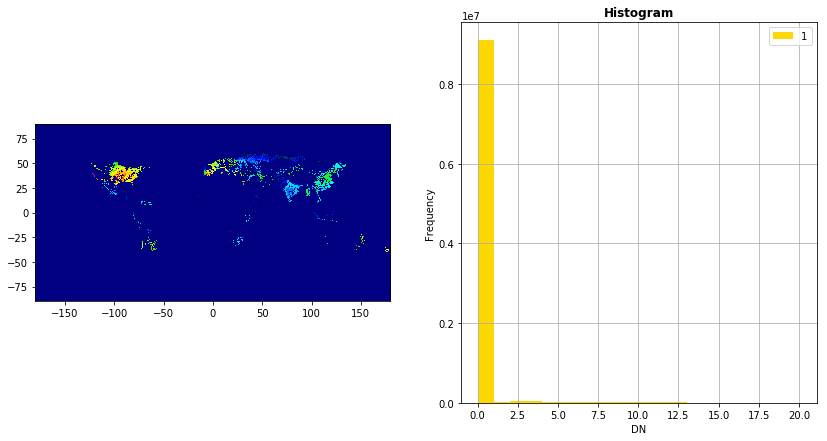

## act2000_i_pls_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


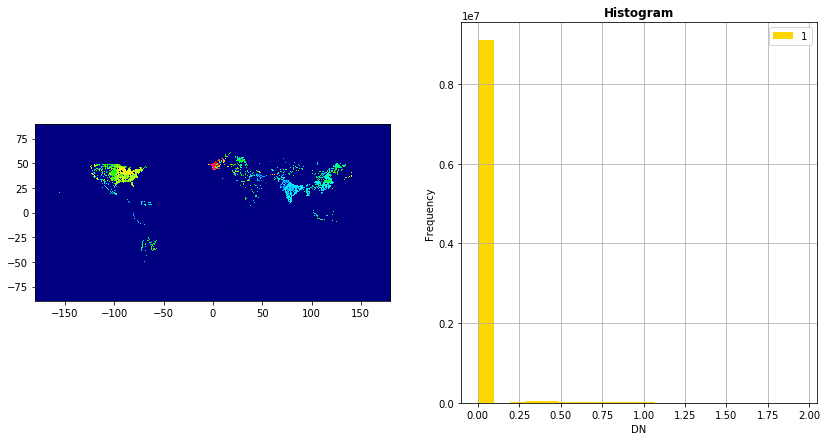

## act2000_i_rcw_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


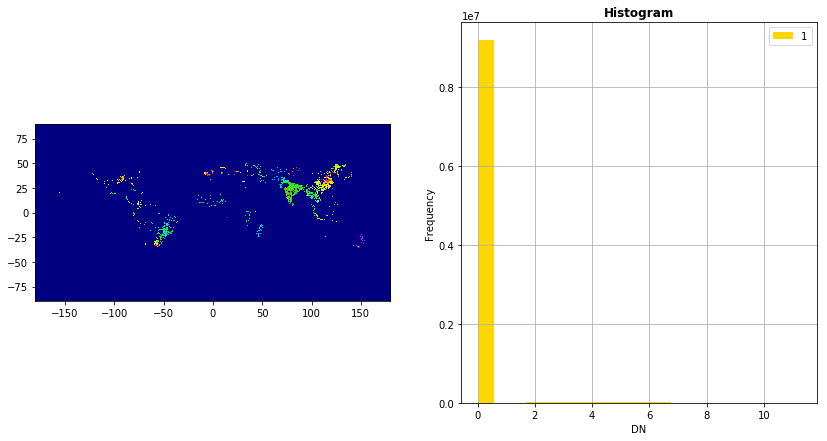

## act2000_r_mze_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


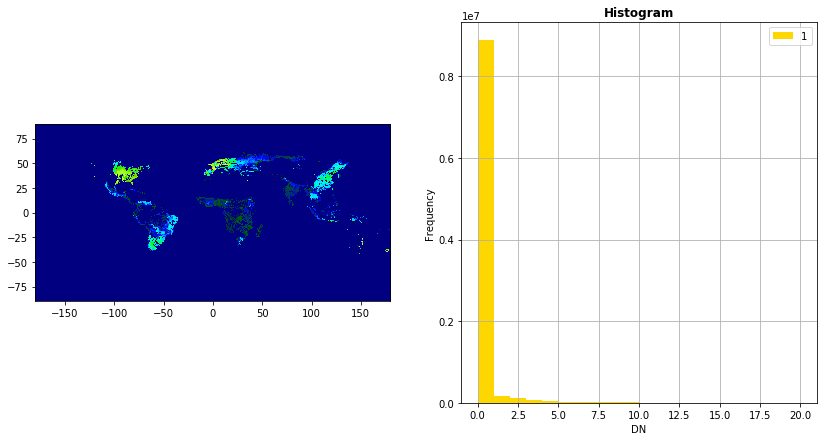

## act2000_r_pls_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


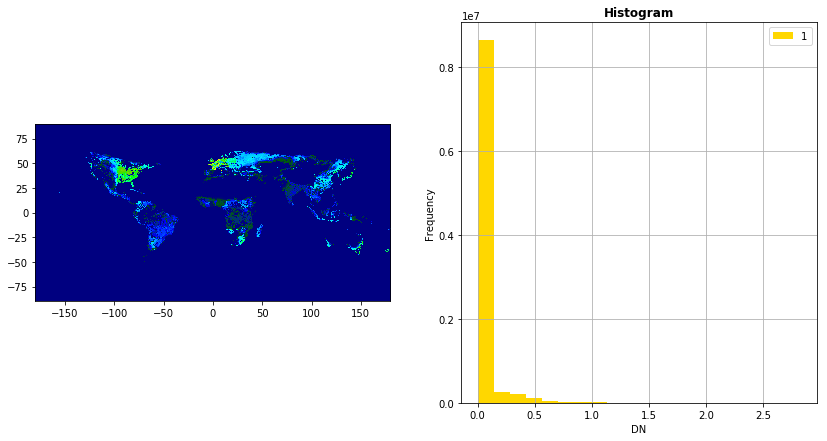

## act2000_r_rcw_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


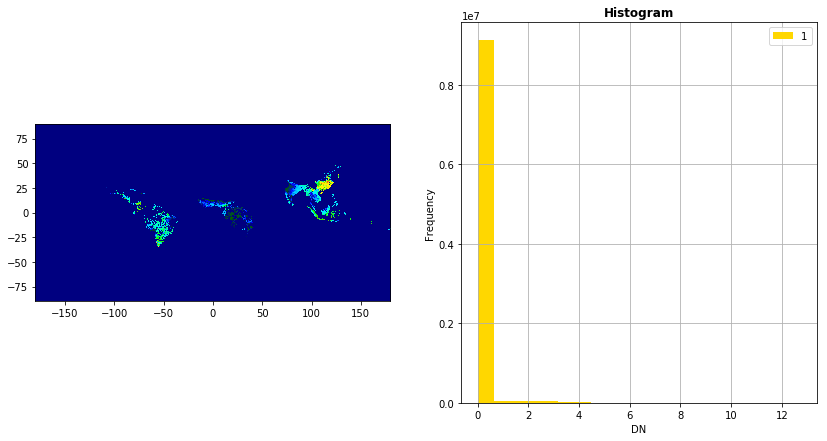

## act2000_t_mze_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


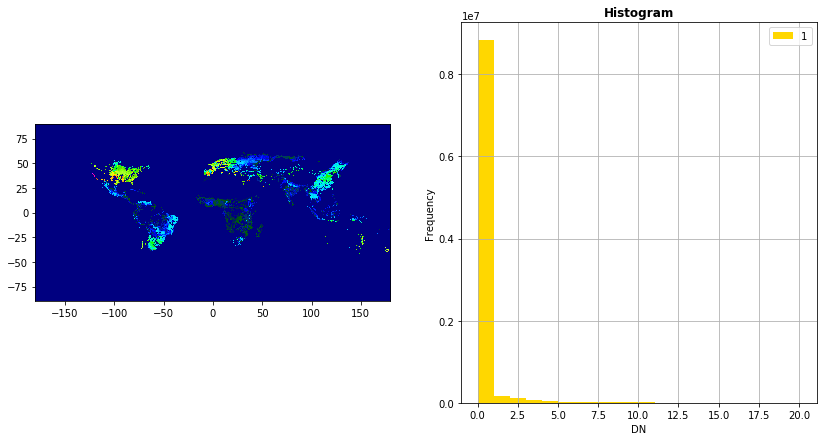

## act2000_t_pls_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


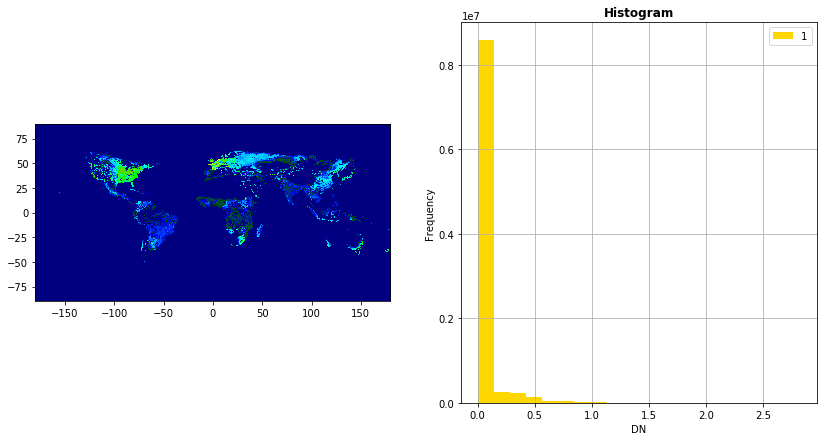

## act2000_t_rcw_2000_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


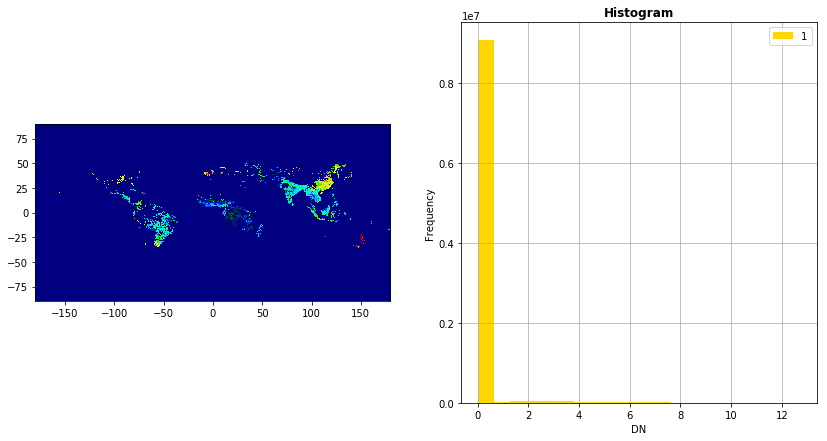

## gap2000_i_mze_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


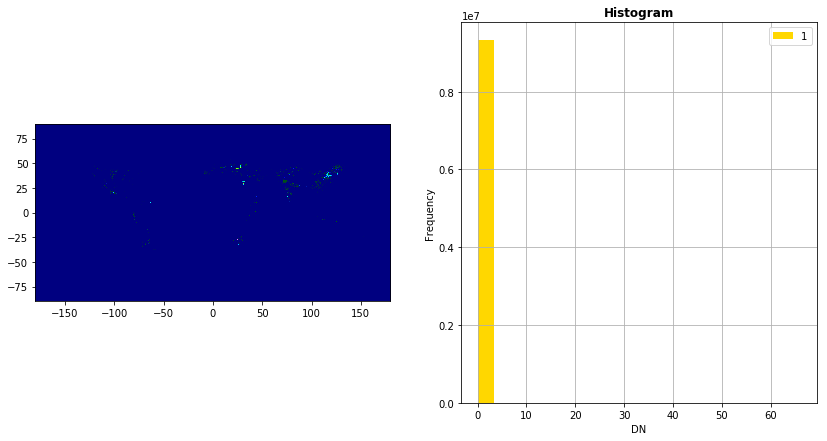

## gap2000_i_mze_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


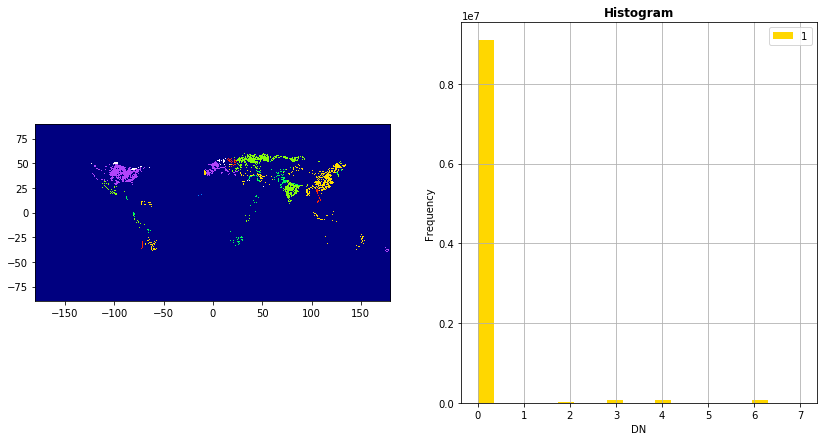

## gap2000_i_pls_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


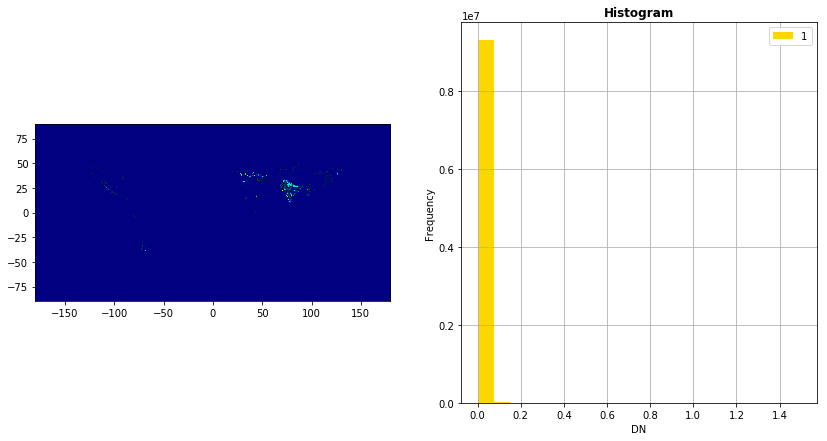

## gap2000_i_pls_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


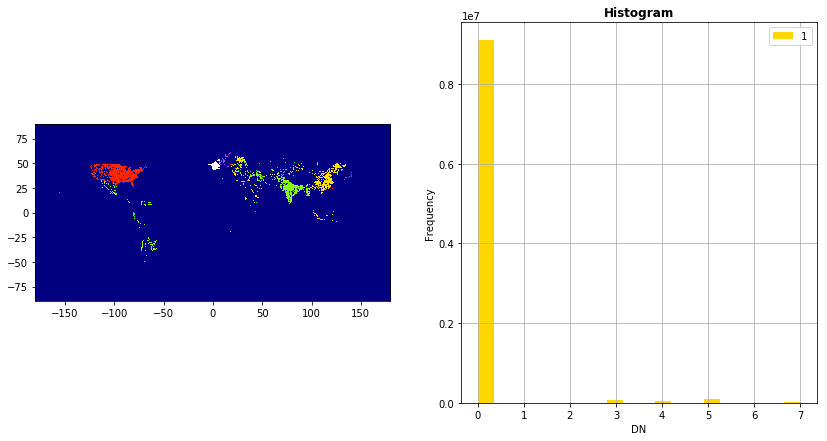

## gap2000_i_rcw_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


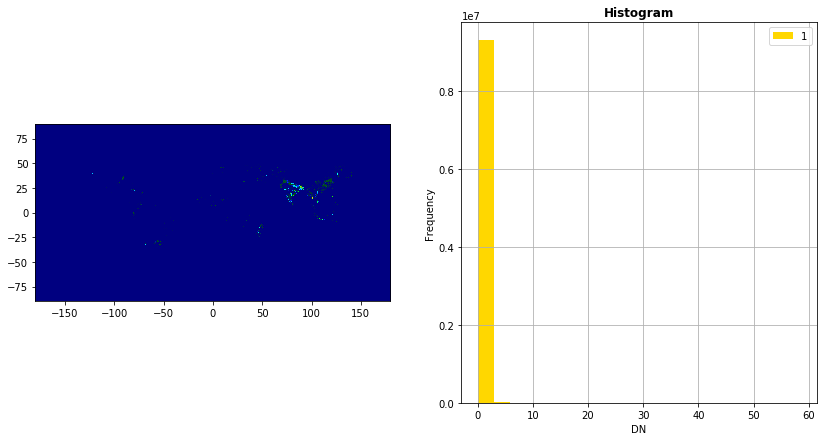

## gap2000_i_rcw_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


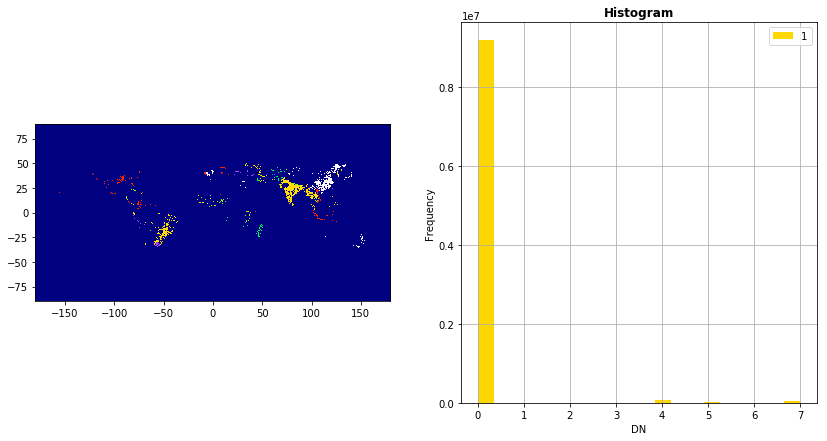

## gap2000_r_mze_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


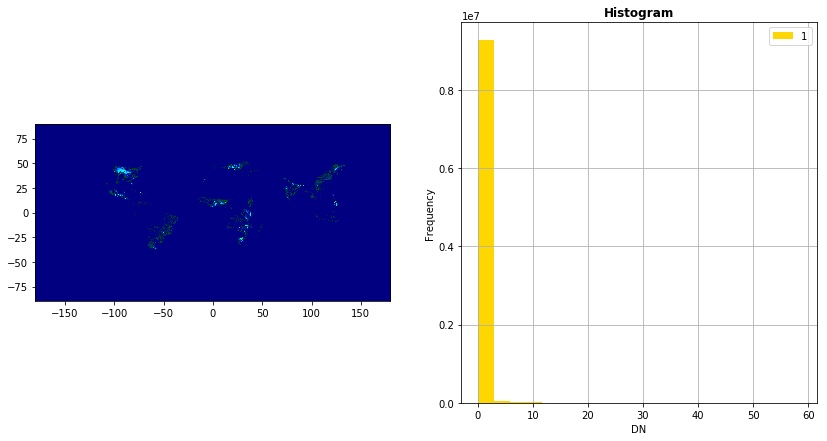

## gap2000_r_mze_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


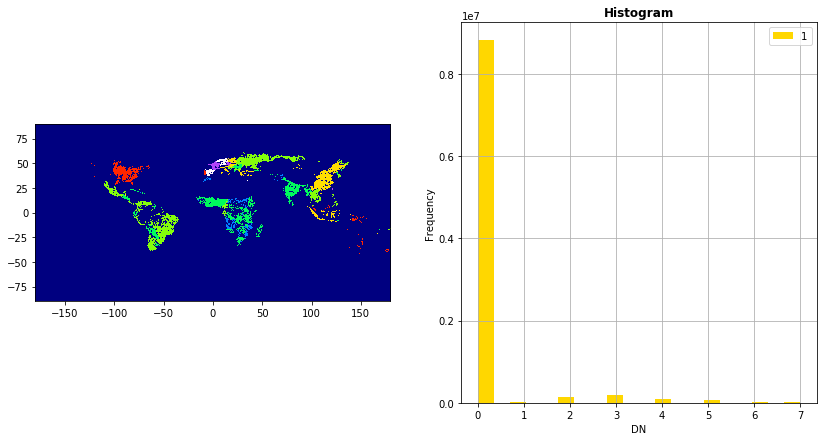

## gap2000_r_pls_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


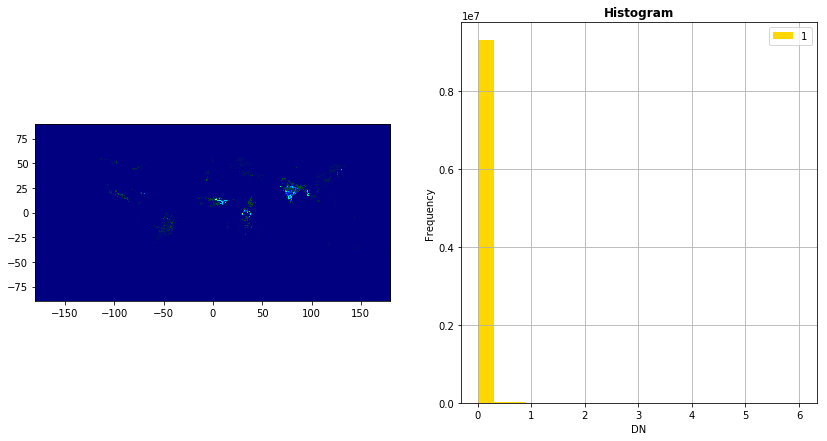

## gap2000_r_pls_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


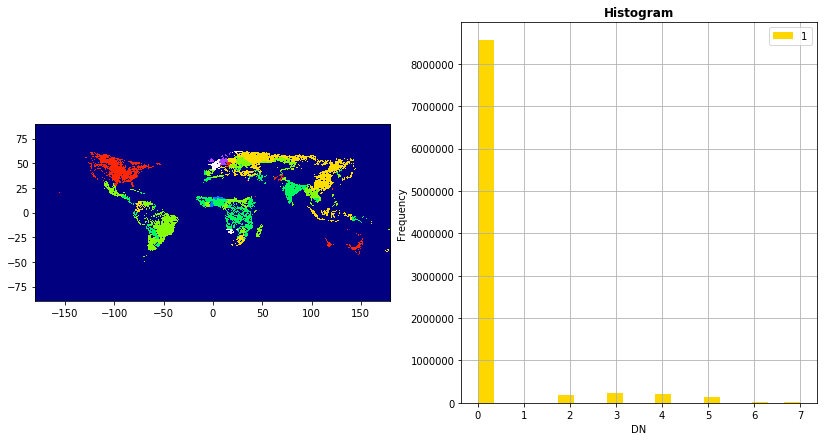

## gap2000_r_rcw_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


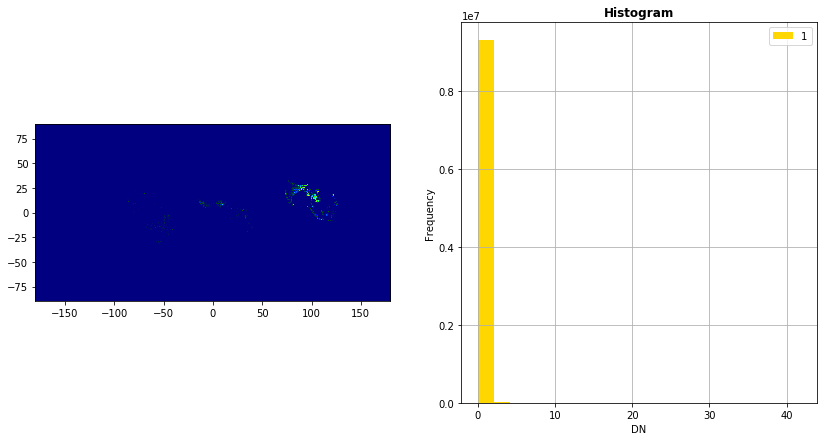

## gap2000_r_rcw_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


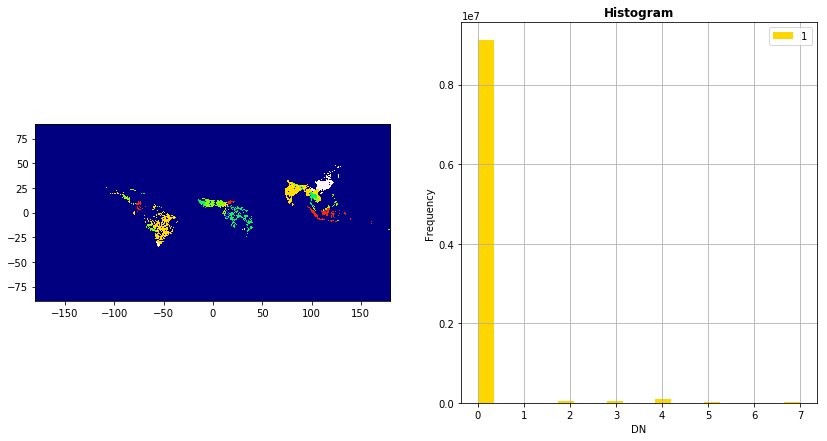

## gap2000_t_mze_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


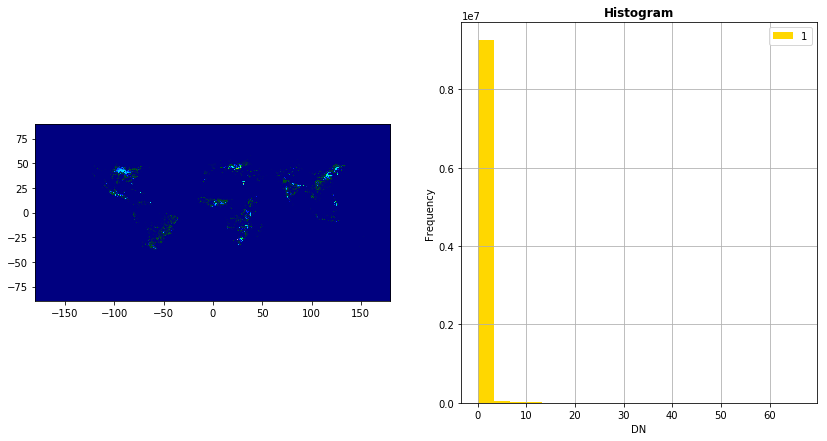

## gap2000_t_mze_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


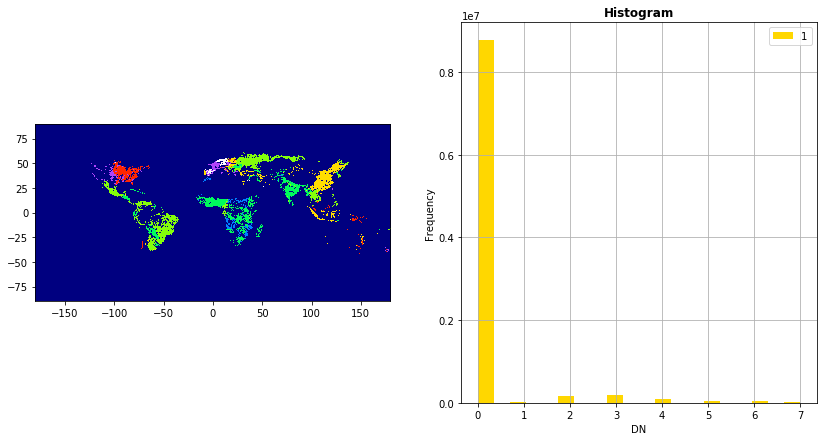

## gap2000_t_pls_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


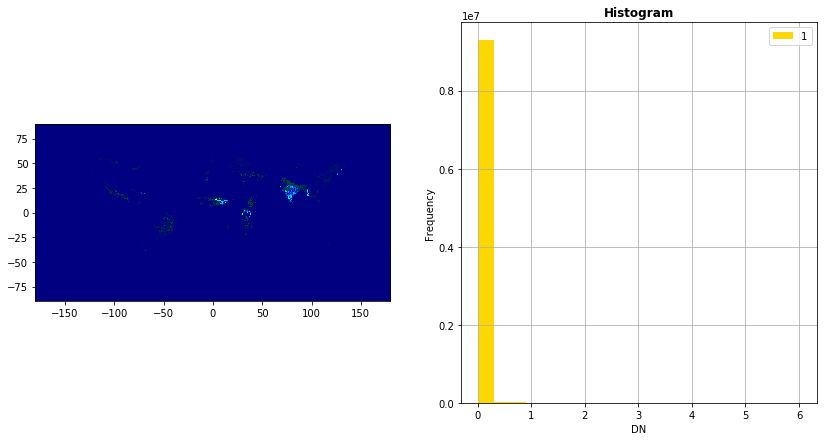

## gap2000_t_pls_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


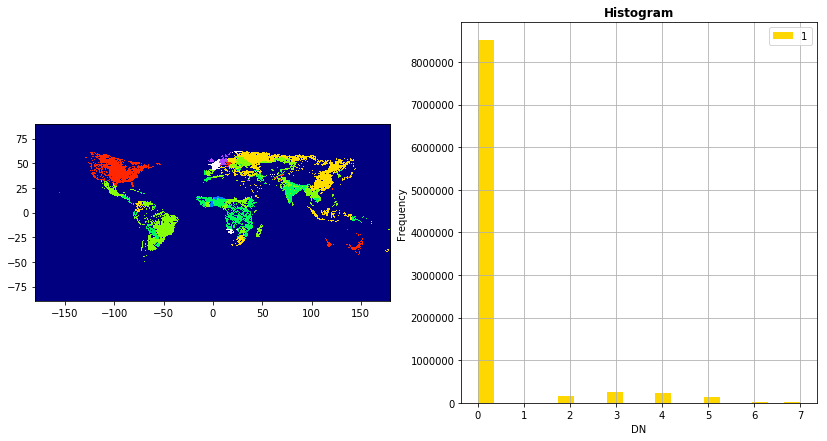

## gap2000_t_rcw_2000_qga.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


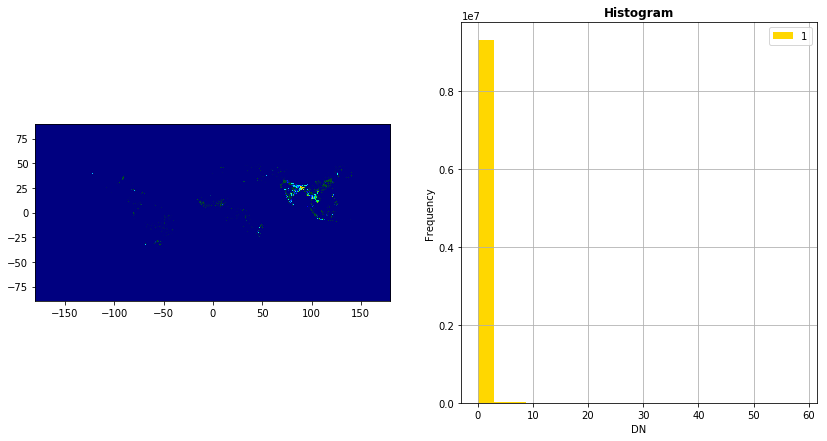

## gap2000_t_rcw_2000_yga_cl.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


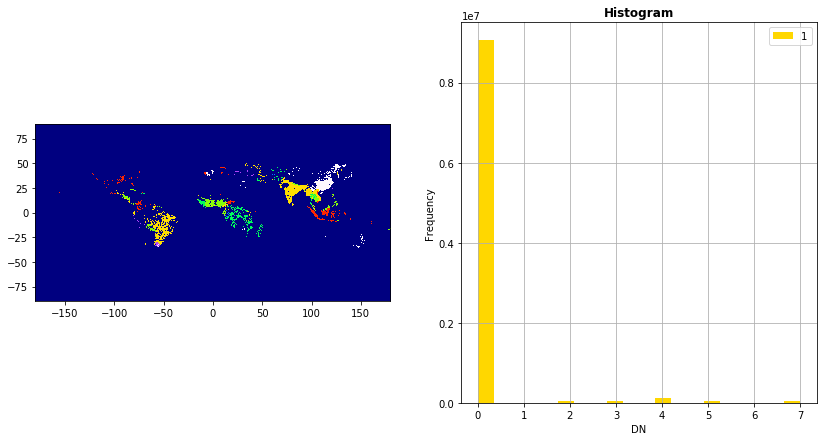

## maize_acy_cur.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


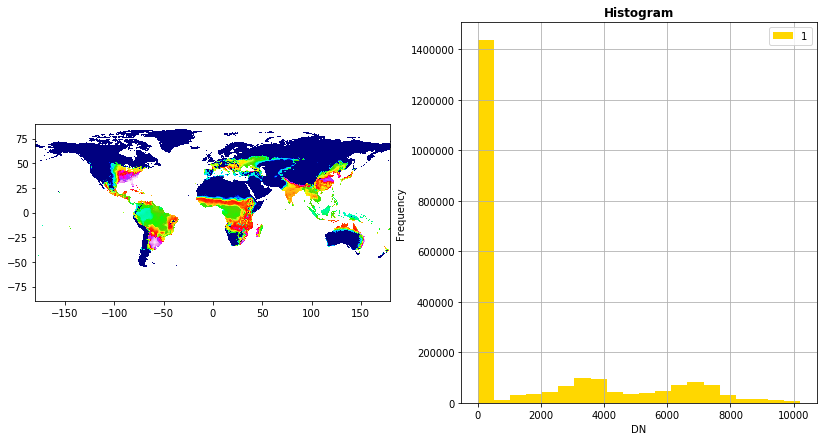

## maize_acy_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


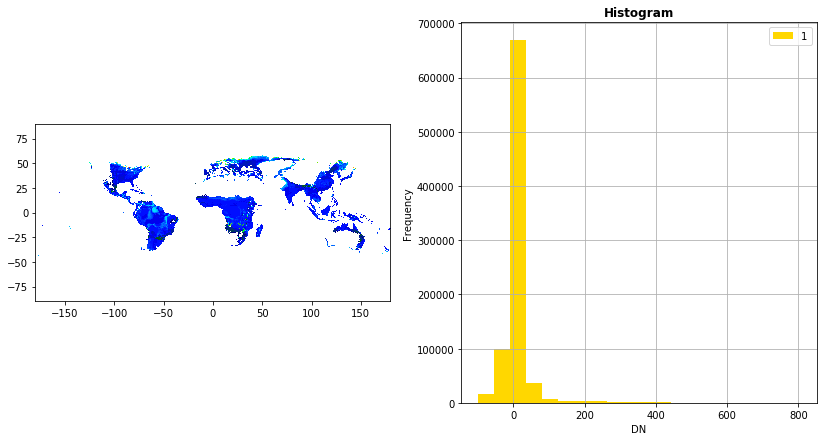

## maize_acy_fut.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


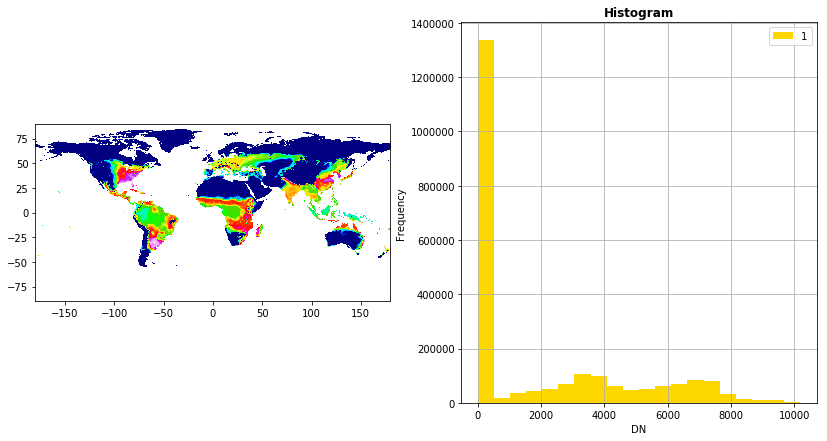

## maize_acy_r_h.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


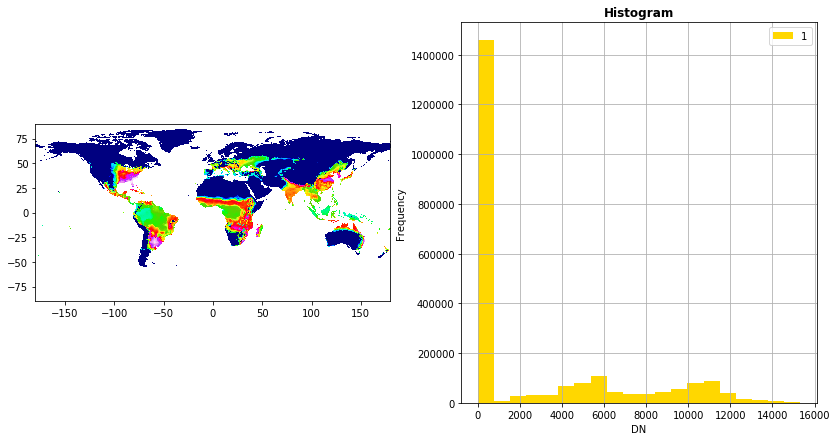

## maize_acy_r_l.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


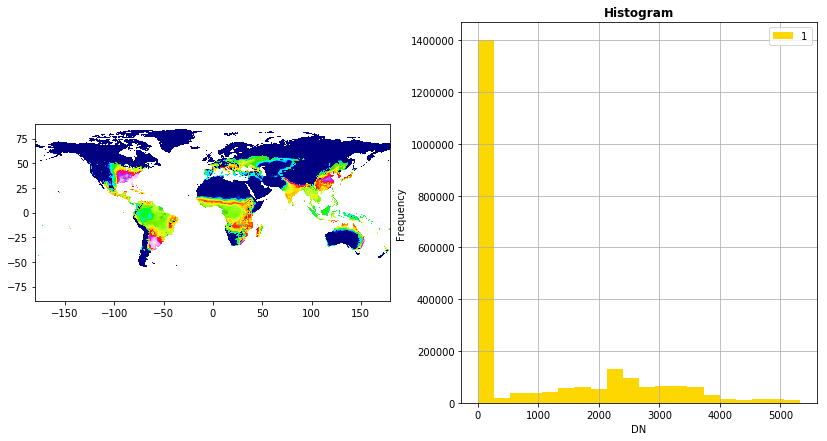

## maize_cur_i.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


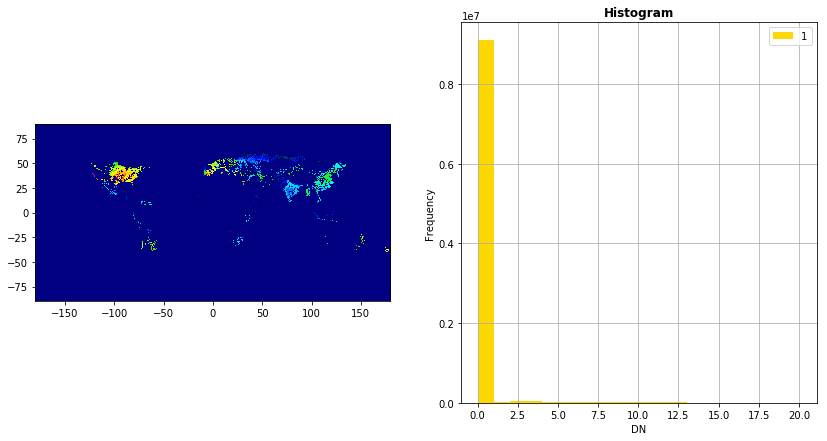

## maize_cur_r.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


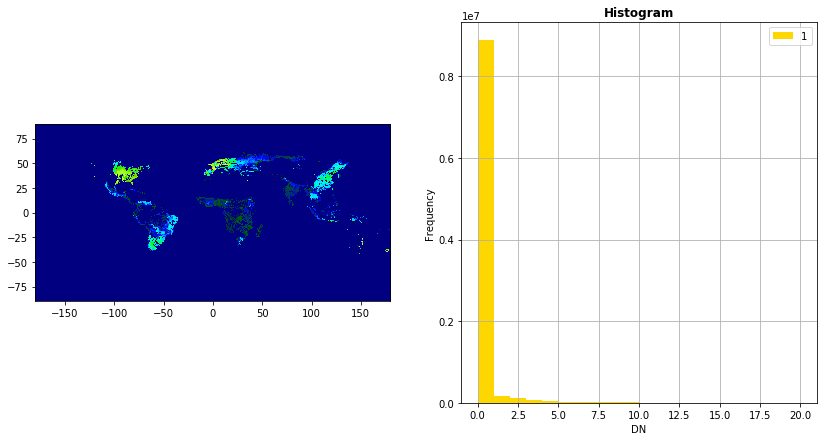

## maize_ygap_i_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


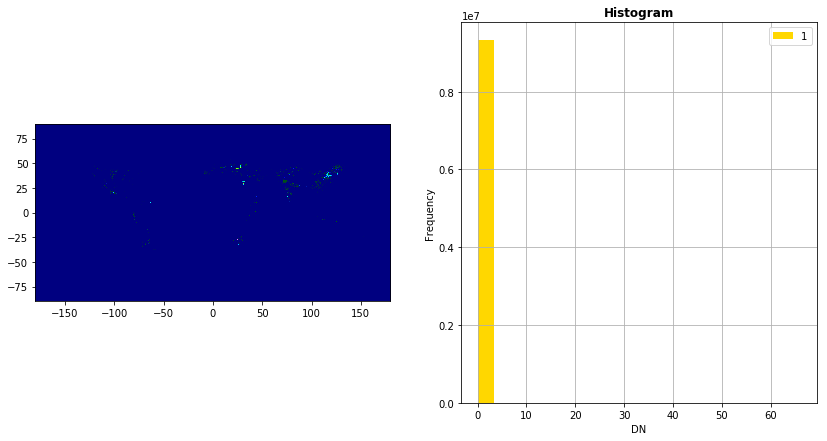

## maize_ygap_ir_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


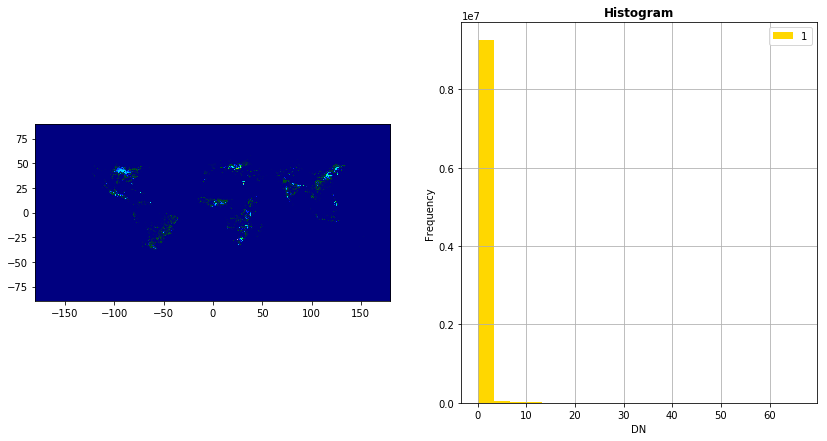

## maize_ygap_r_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


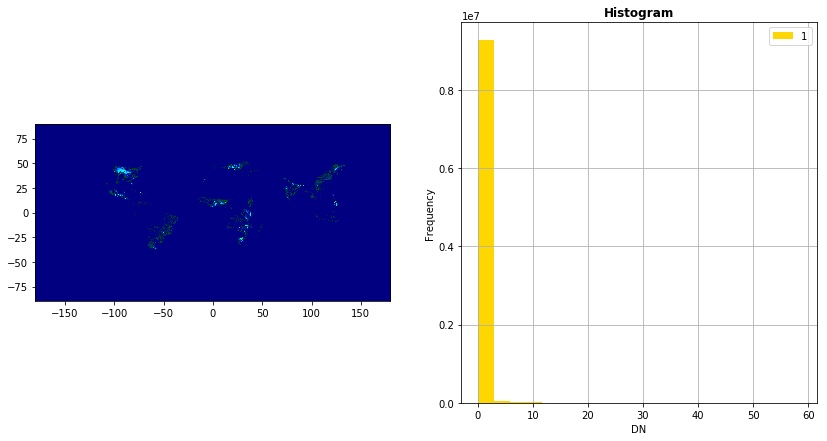

## pulses_acy_cur.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


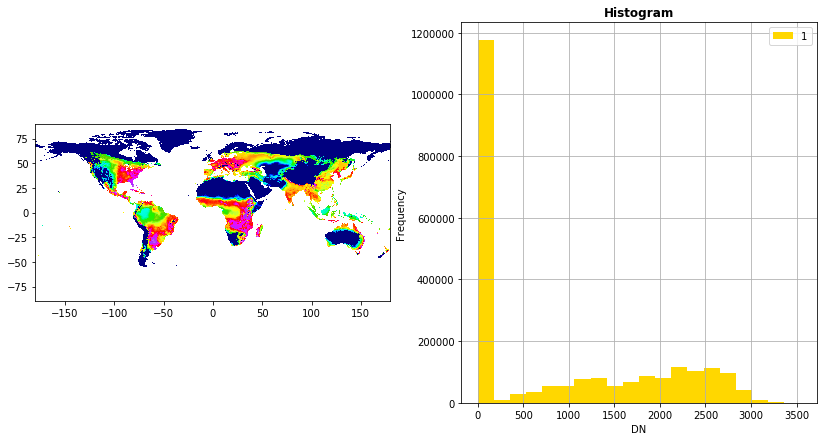

## pulses_acy_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


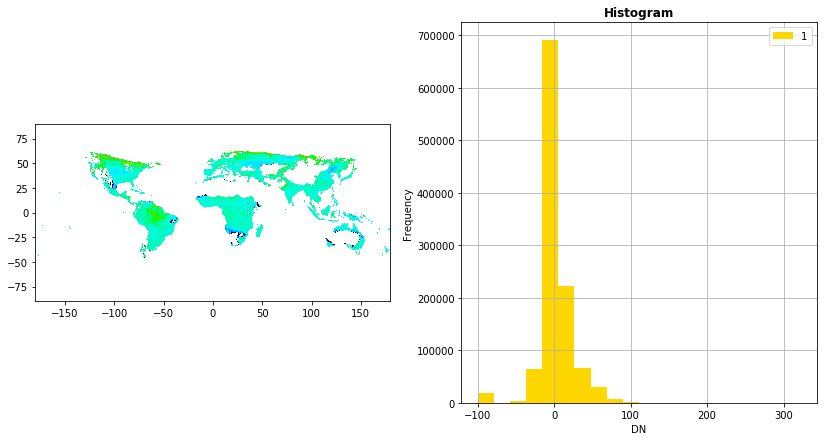

## pulses_acy_fut.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


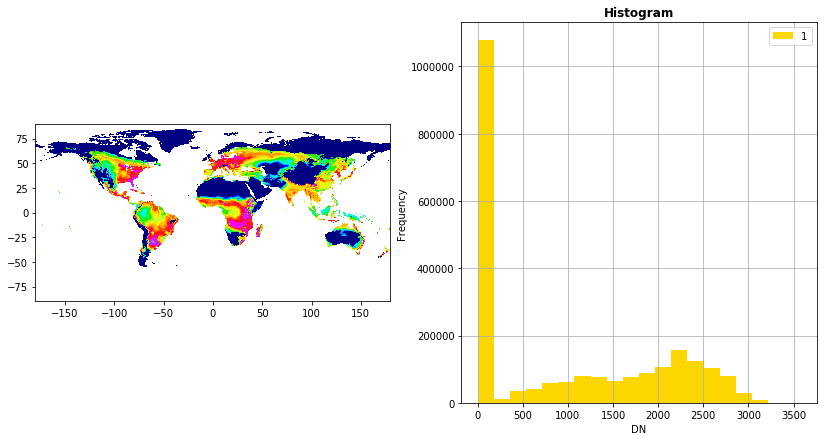

## pulses_acy_r_h.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


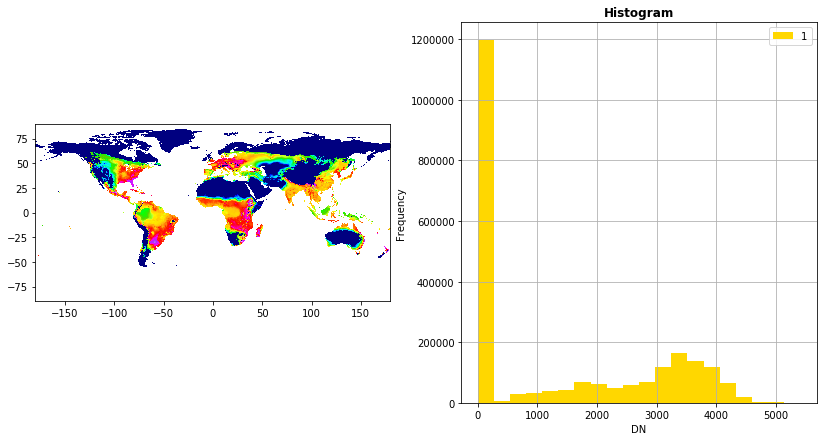

## pulses_acy_r_l.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


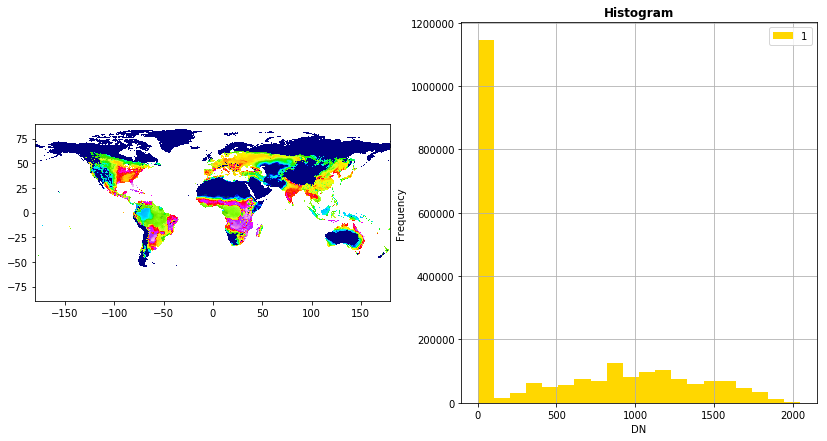

## pulses_cur_i.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


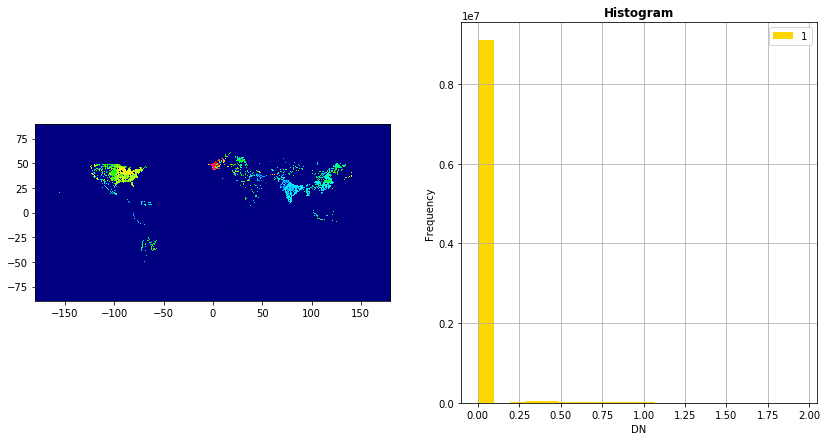

## pulses_cur_r.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


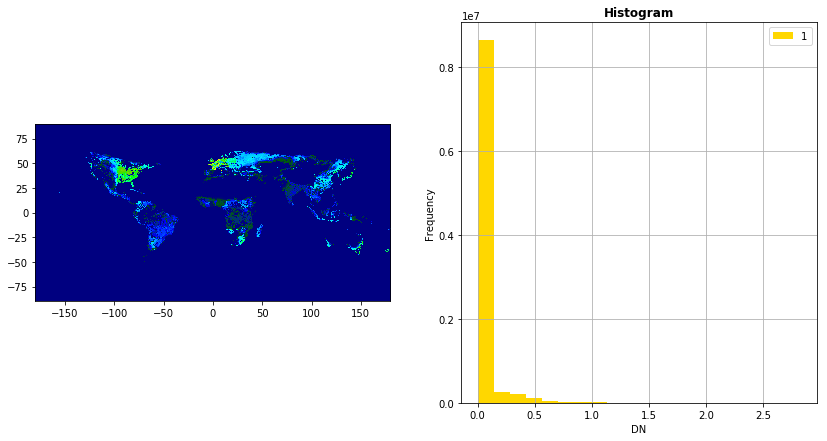

## pulses_ygap_i_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


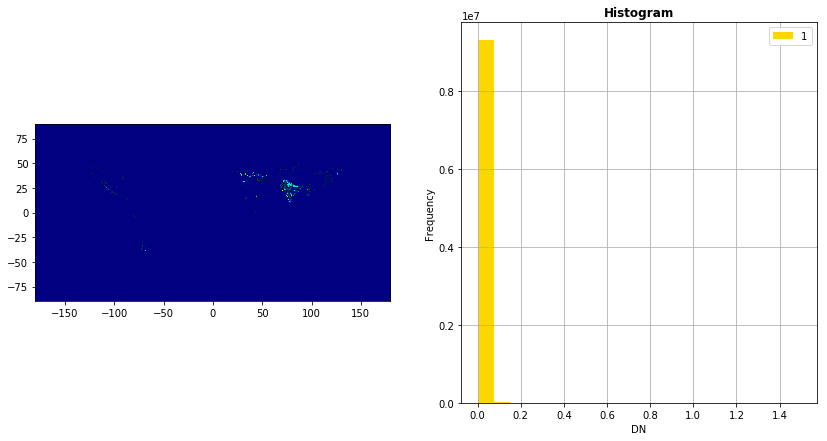

## pulses_ygap_ir_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


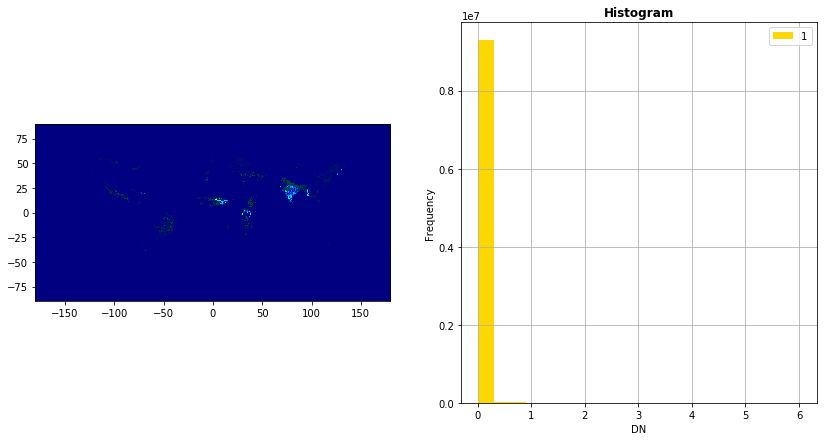

## pulses_ygap_r_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


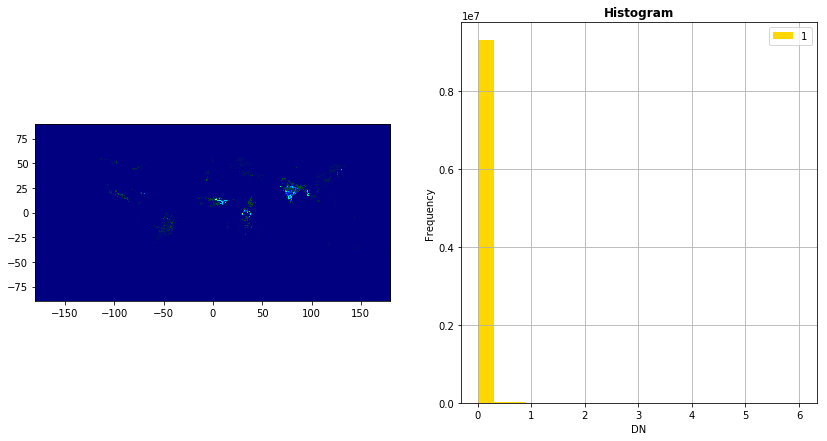

## res02_c2a22020h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


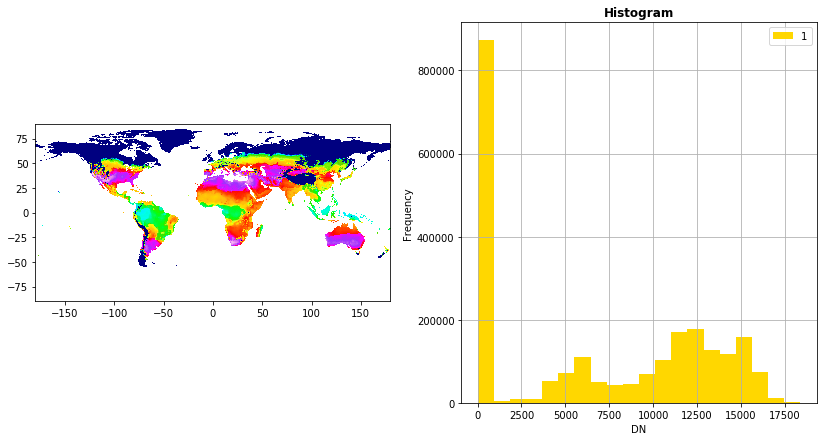

## res02_c2a22020h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


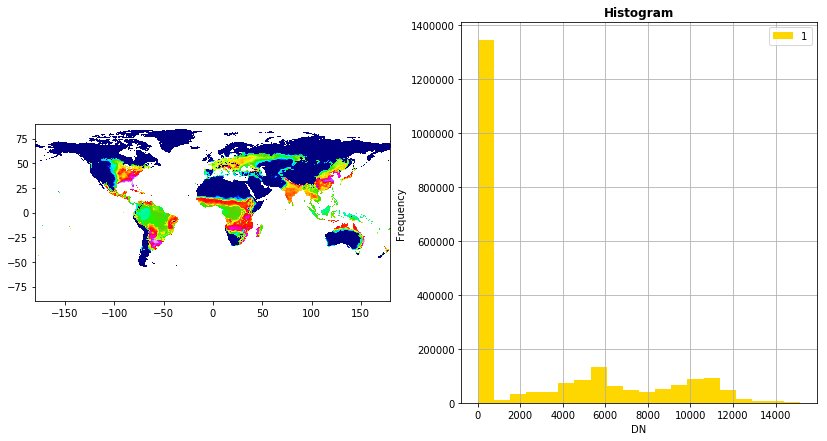

## res02_c2a22020h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


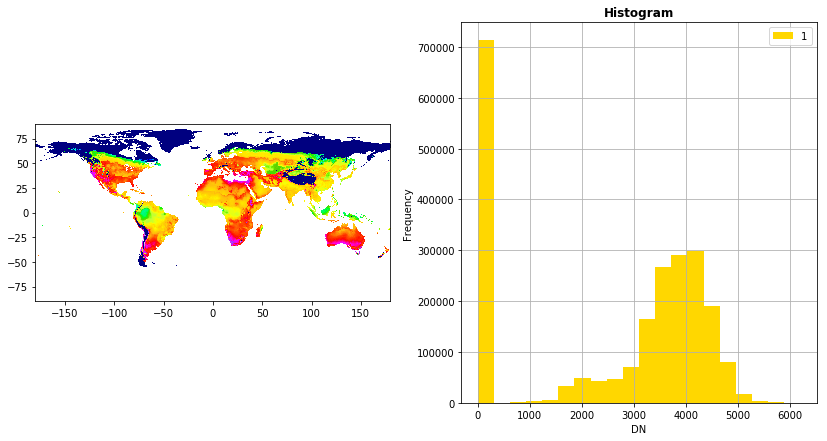

## res02_c2a22020h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


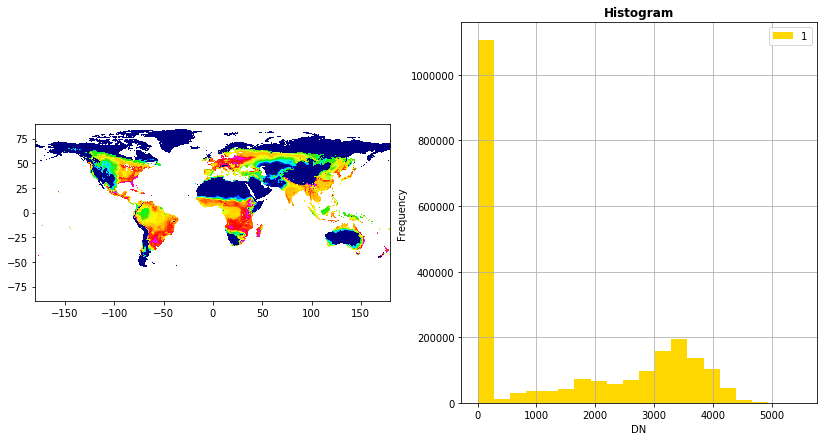

## res02_c2a22020h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22020h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


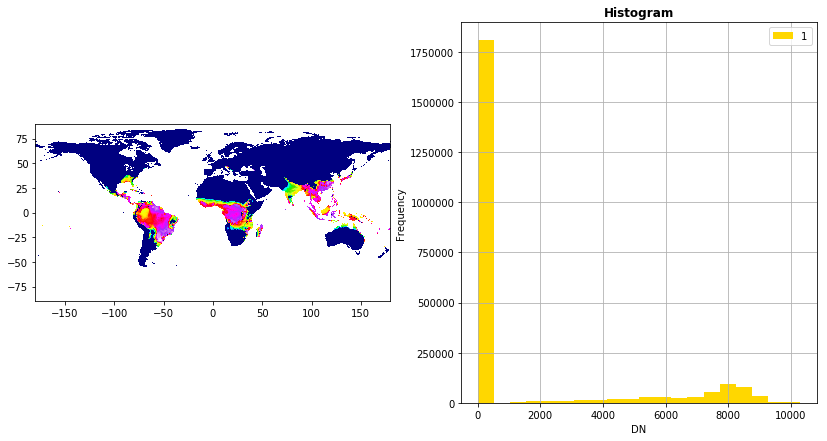

## res02_c2a22020i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


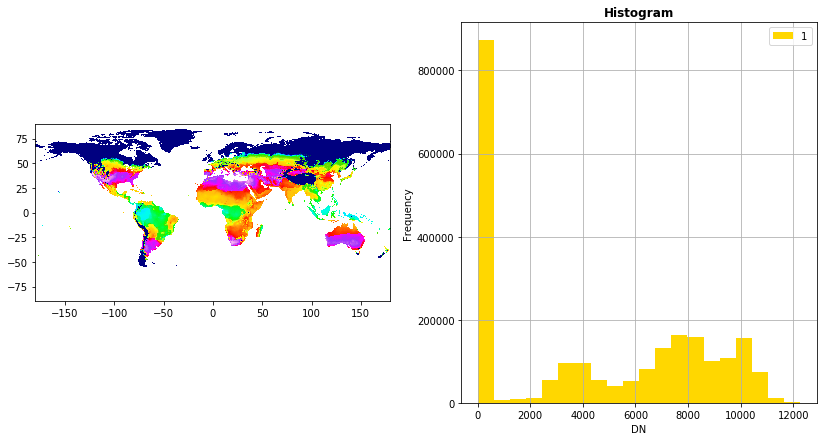

## res02_c2a22020i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


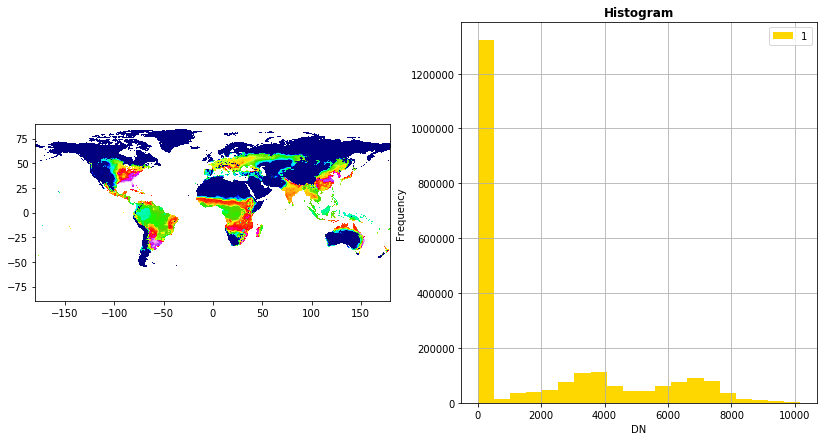

## res02_c2a22020i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


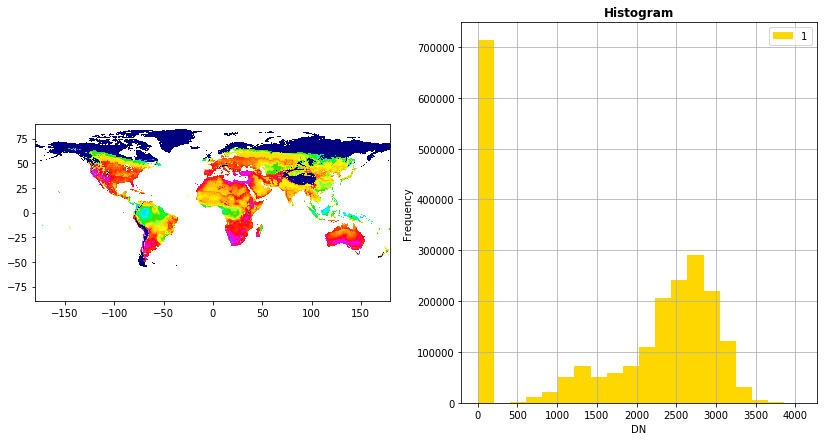

## res02_c2a22020i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


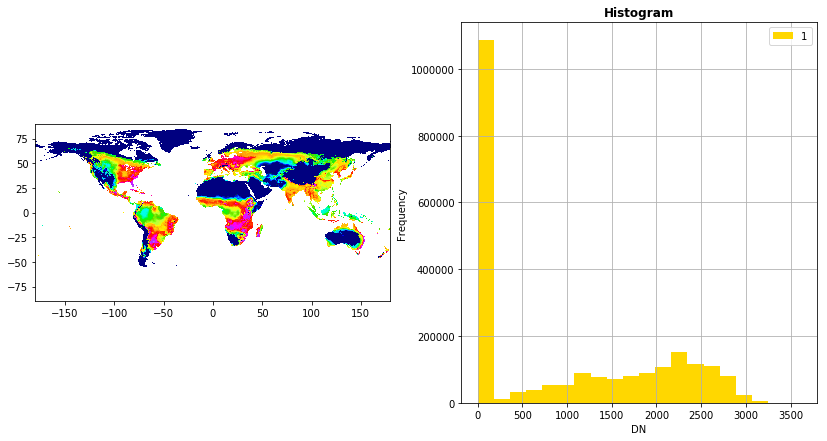

## res02_c2a22020i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22020i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


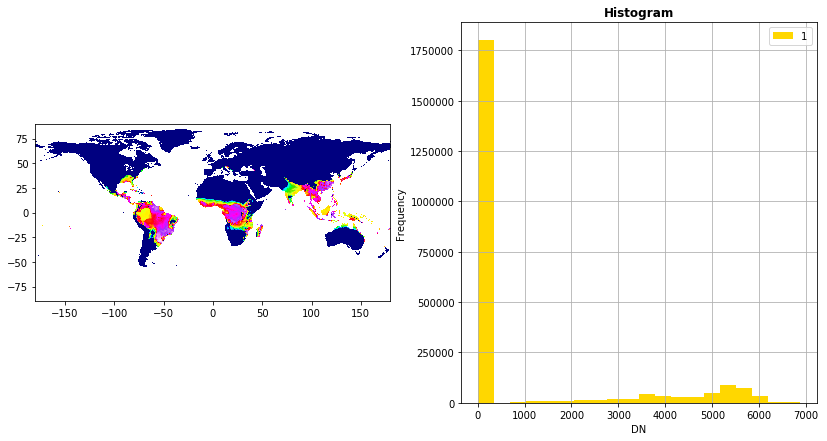

## res02_c2a22020l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


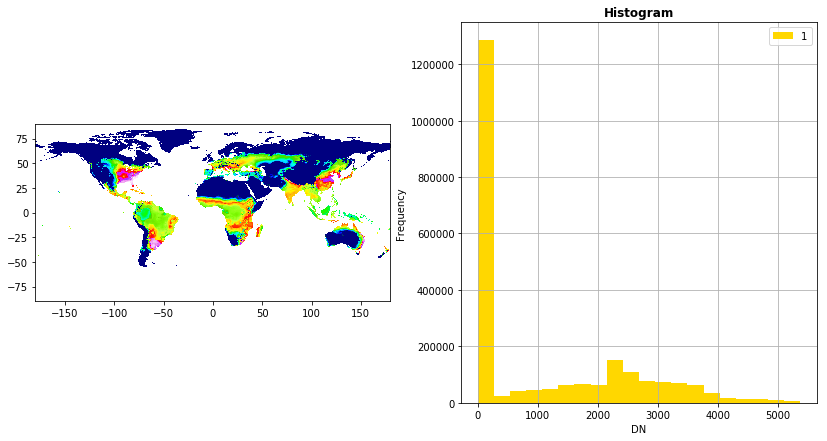

## res02_c2a22020l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


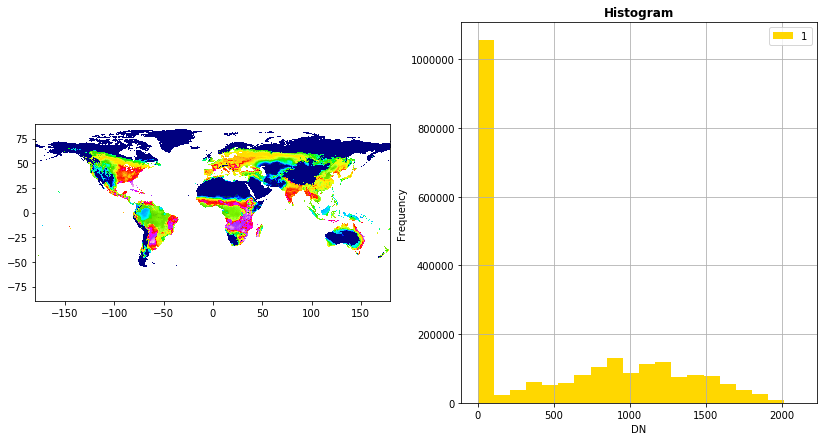

## res02_c2a22020l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


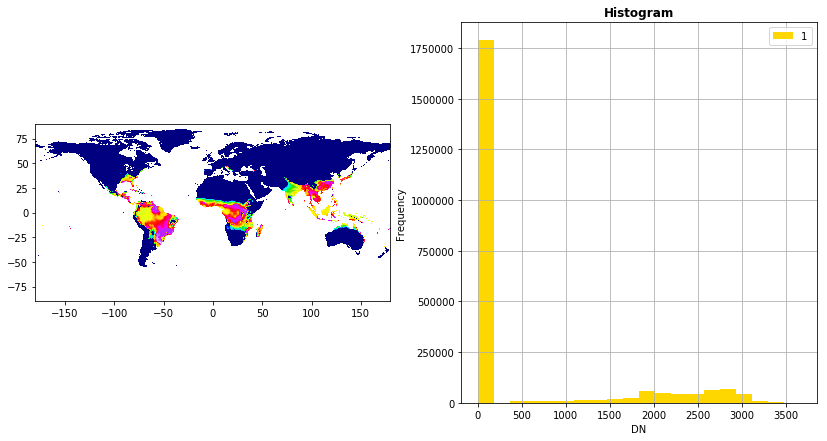

## res02_c2a22050h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


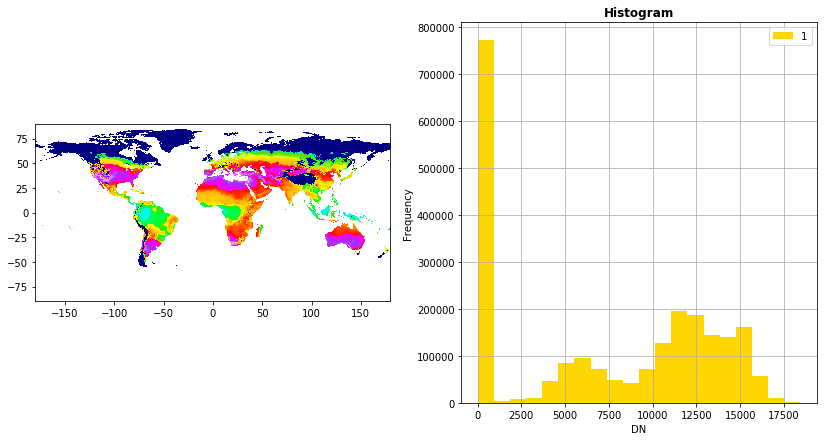

## res02_c2a22050h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


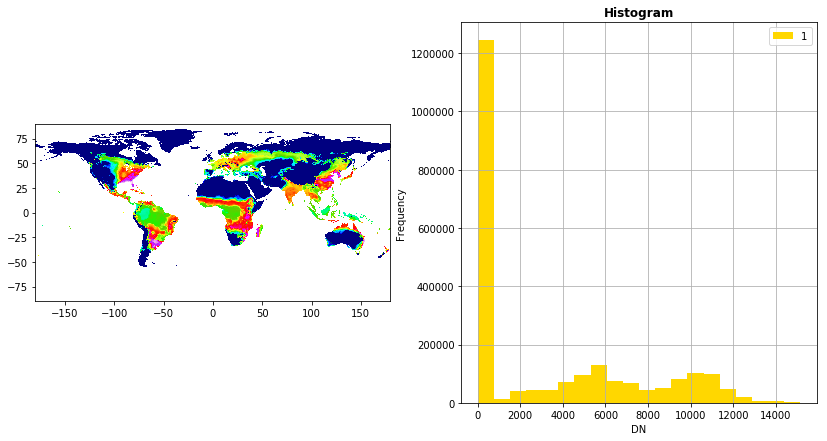

## res02_c2a22050h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


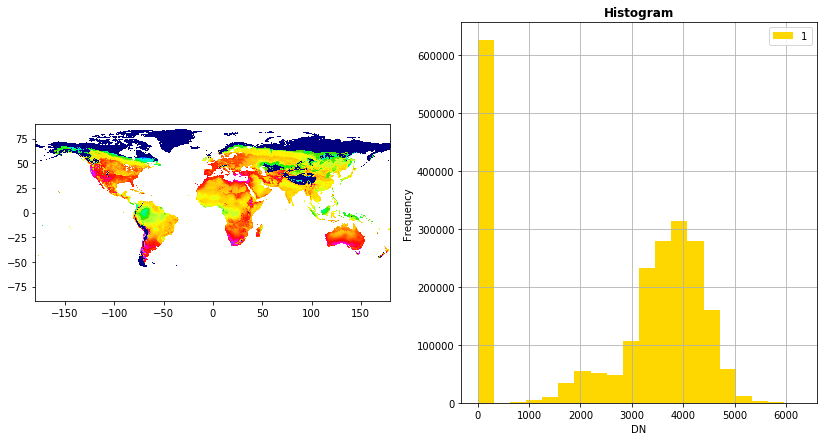

## res02_c2a22050h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


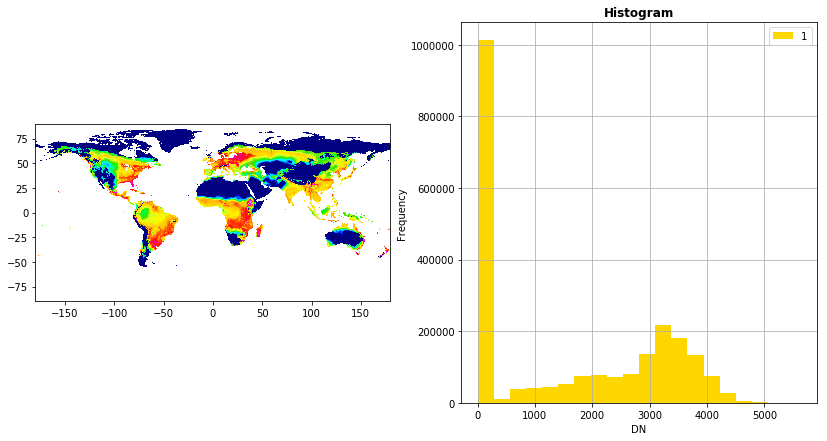

## res02_c2a22050h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


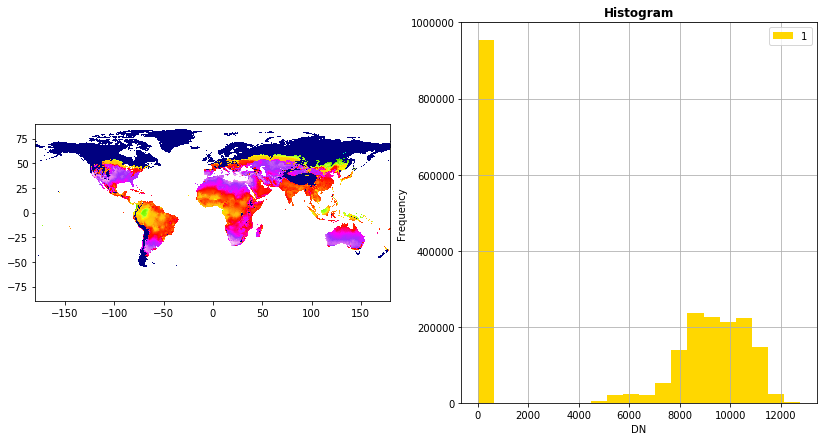

## res02_c2a22050h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


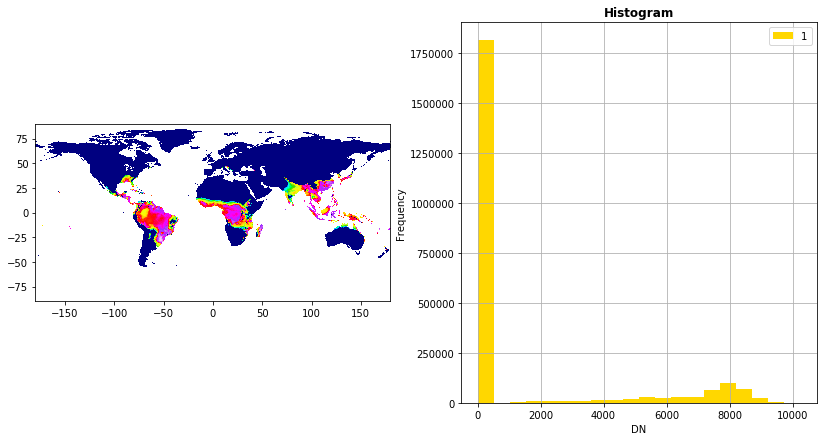

## res02_c2a22050i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


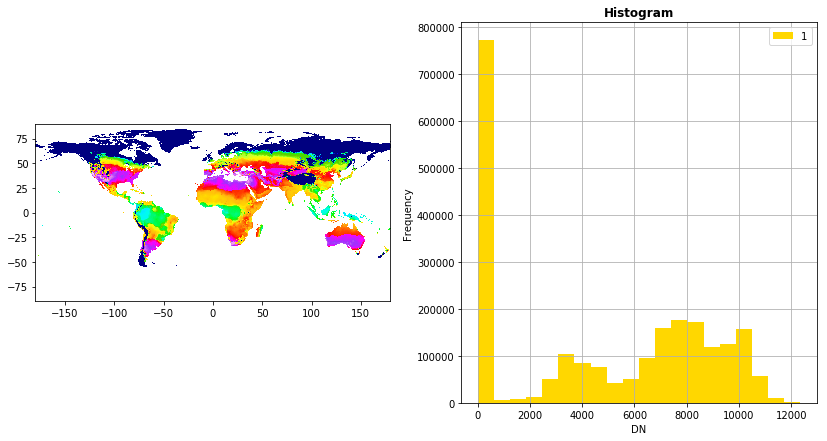

## res02_c2a22050i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


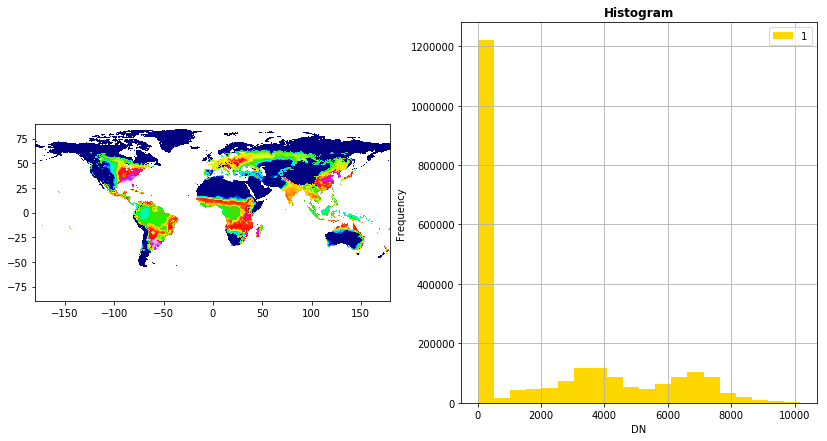

## res02_c2a22050i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


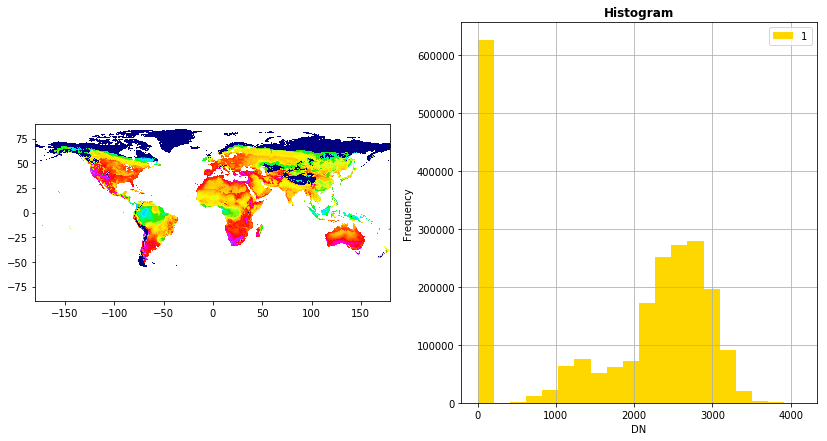

## res02_c2a22050i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


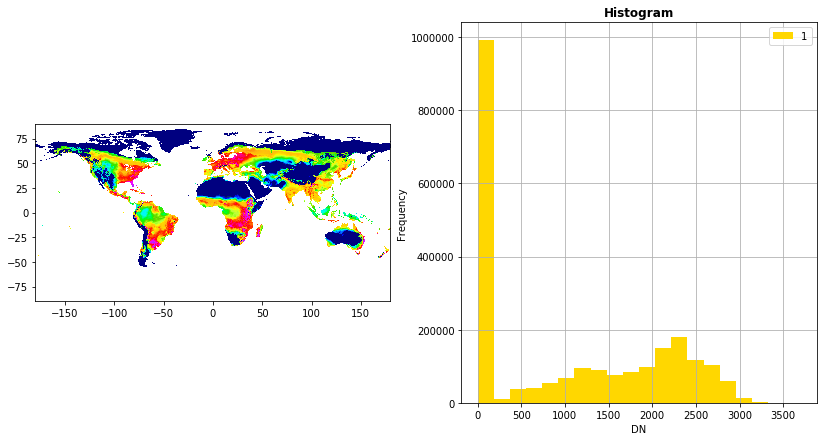

## res02_c2a22050i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


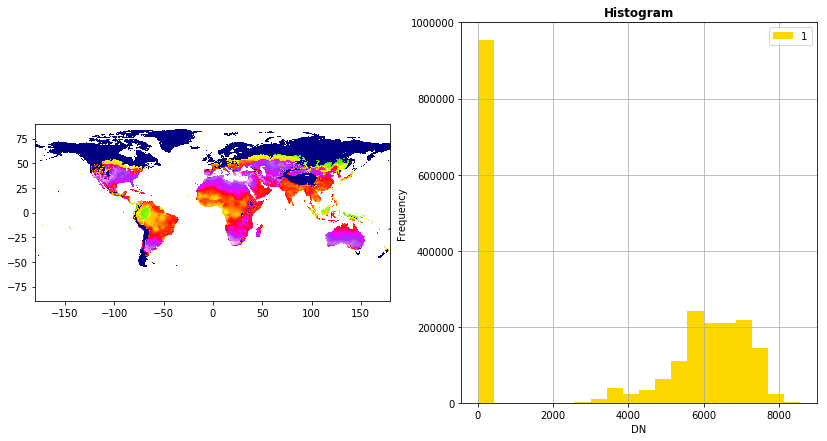

## res02_c2a22050i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


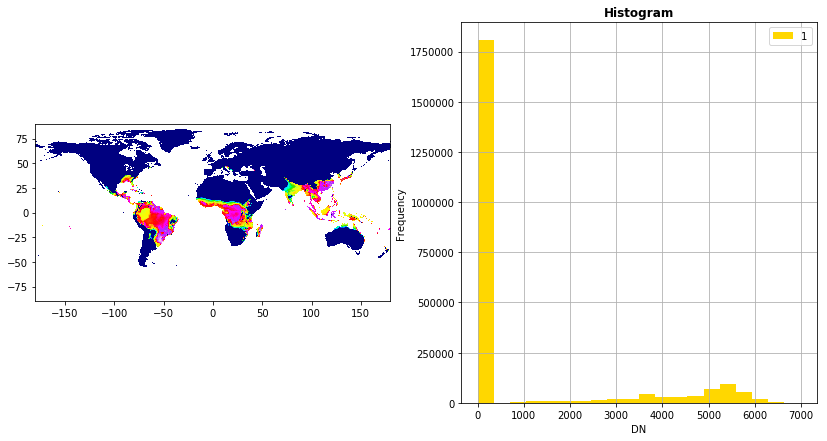

## res02_c2a22050l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


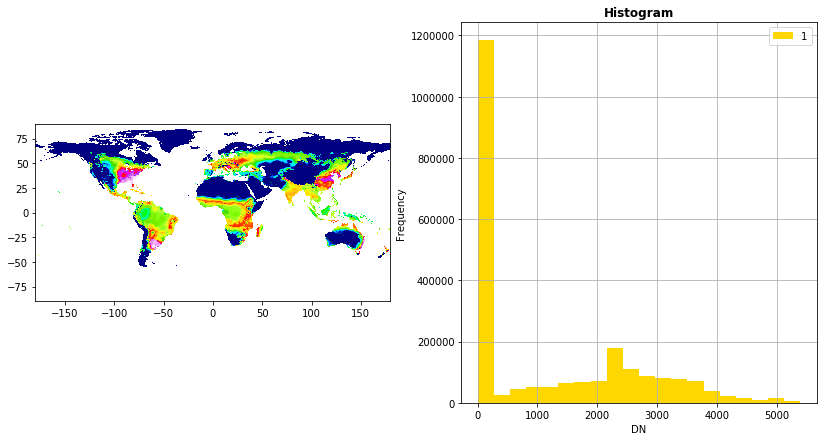

## res02_c2a22050l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


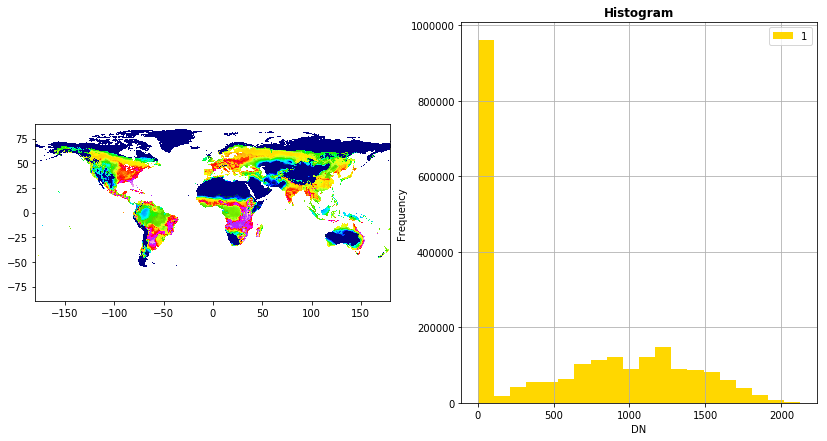

## res02_c2a22050l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


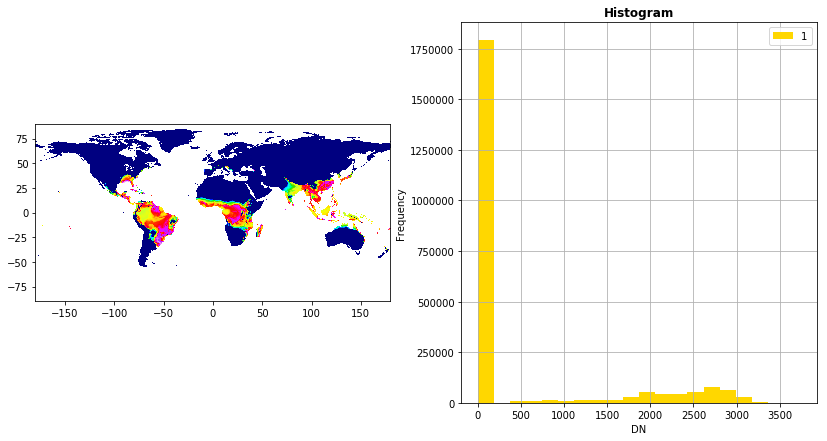

## res02_c2a22080h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


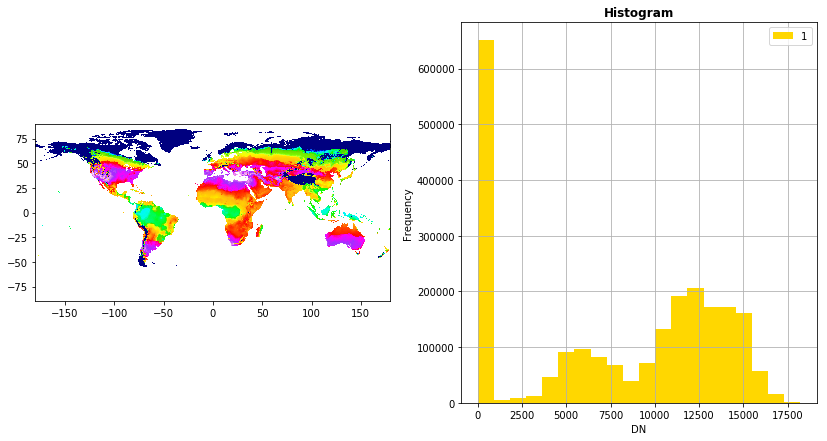

## res02_c2a22080h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


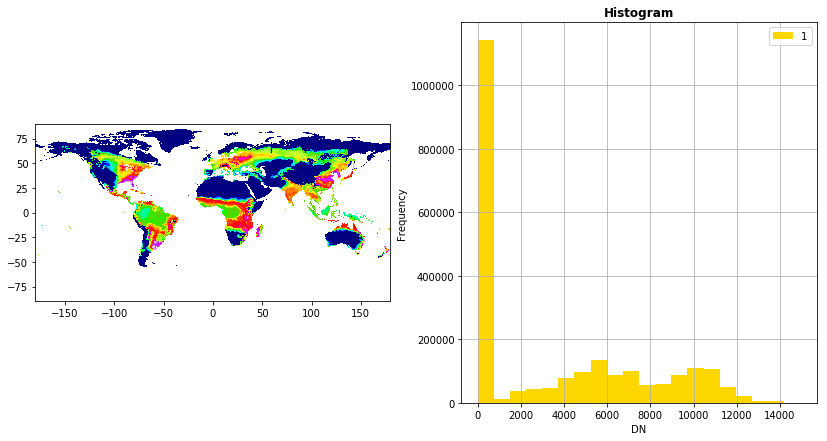

## res02_c2a22080h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


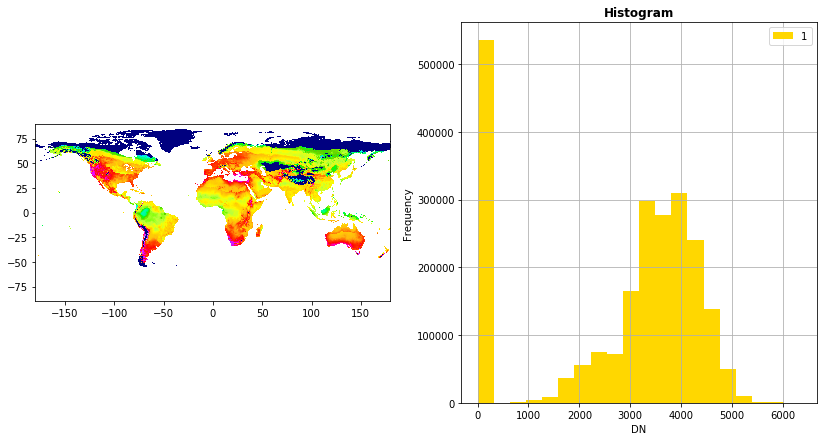

## res02_c2a22080h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


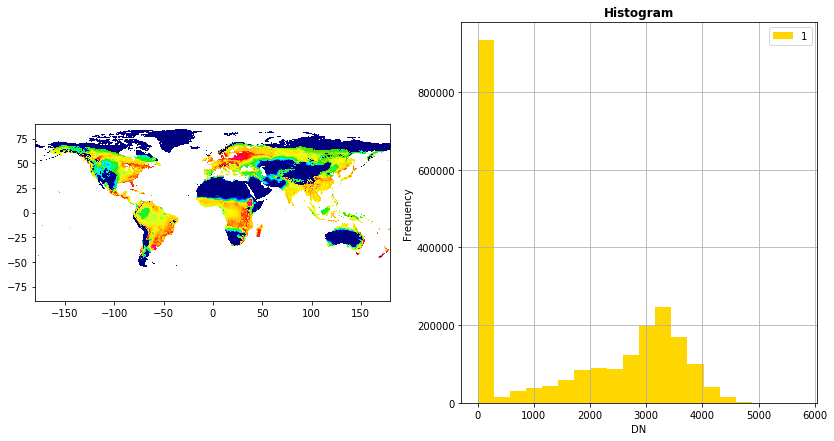

## res02_c2a22080h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


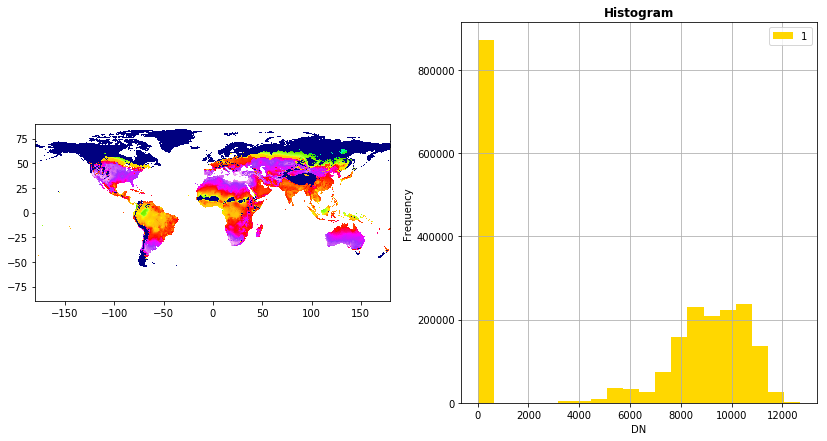

## res02_c2a22080h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


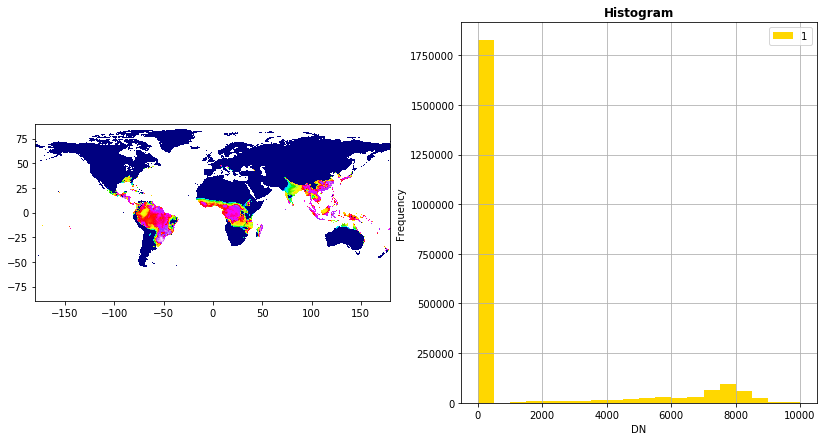

## res02_c2a22080i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


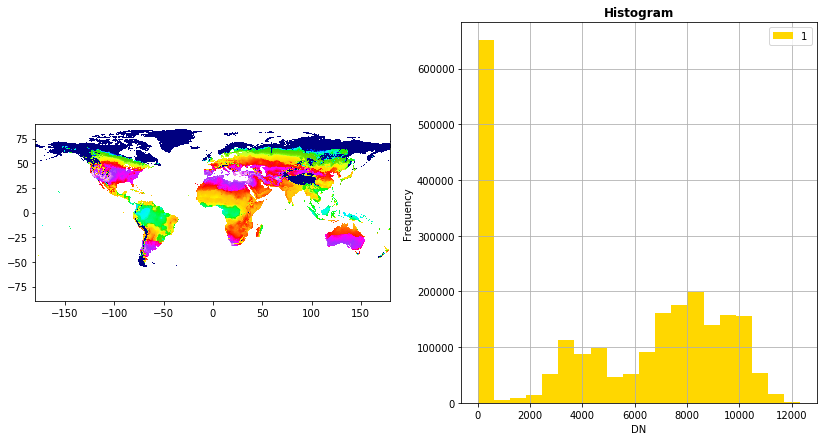

## res02_c2a22080i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


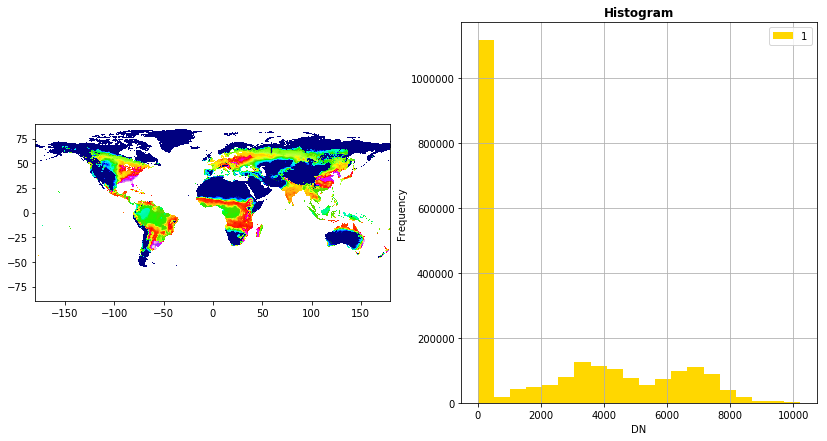

## res02_c2a22080i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


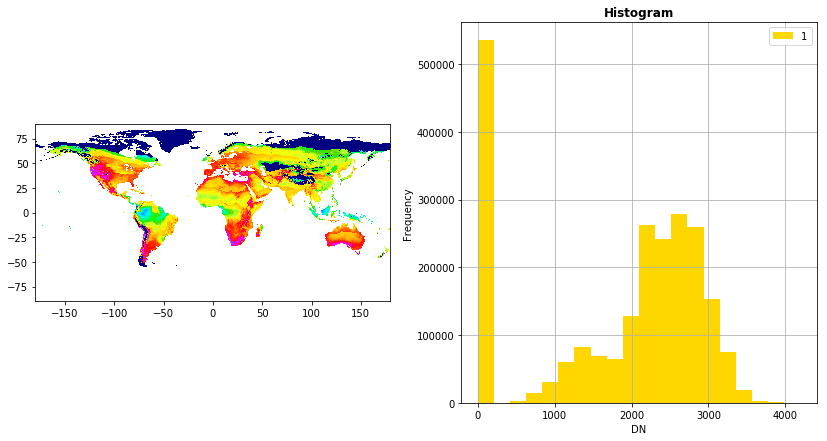

## res02_c2a22080i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


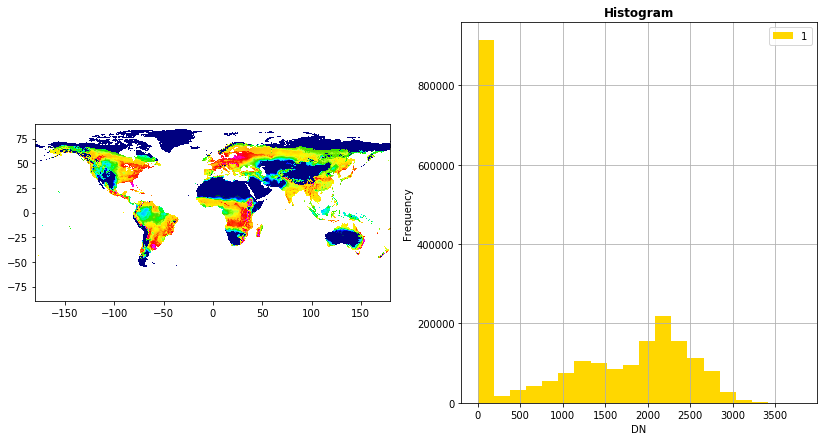

## res02_c2a22080i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22080i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


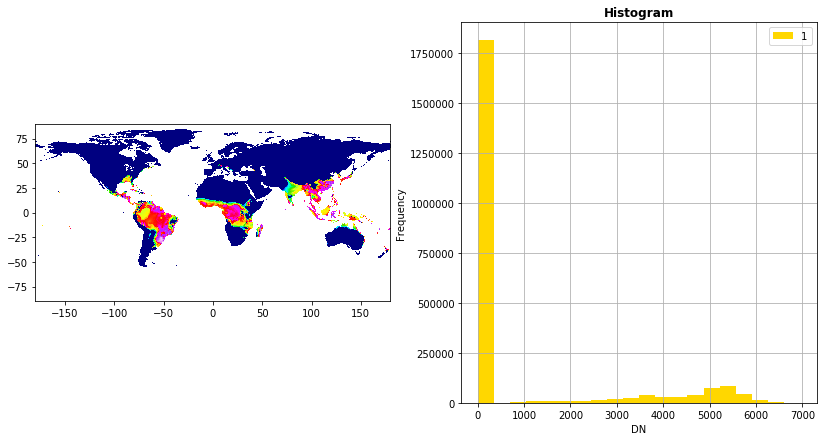

## res02_c2a22080l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


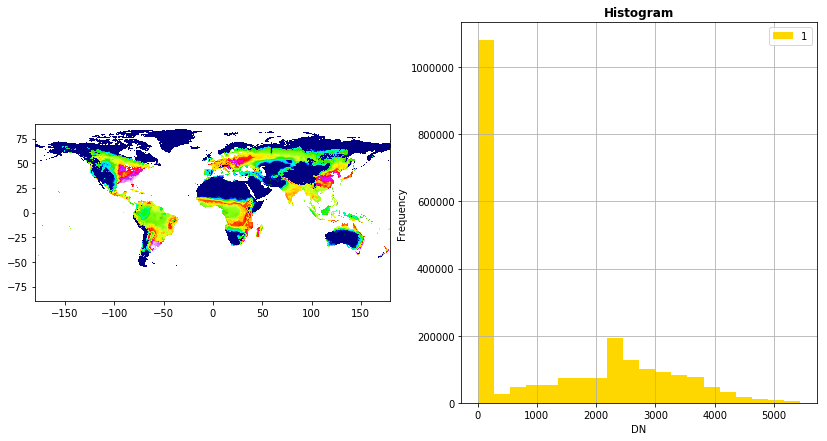

## res02_c2a22080l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


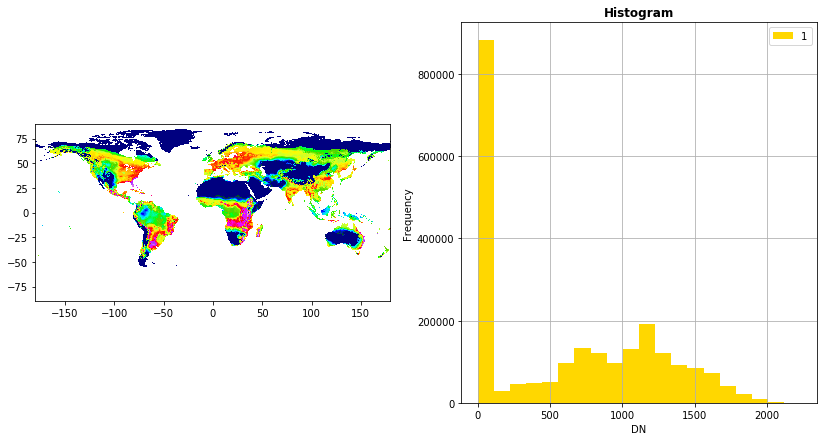

## res02_c2a22080l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


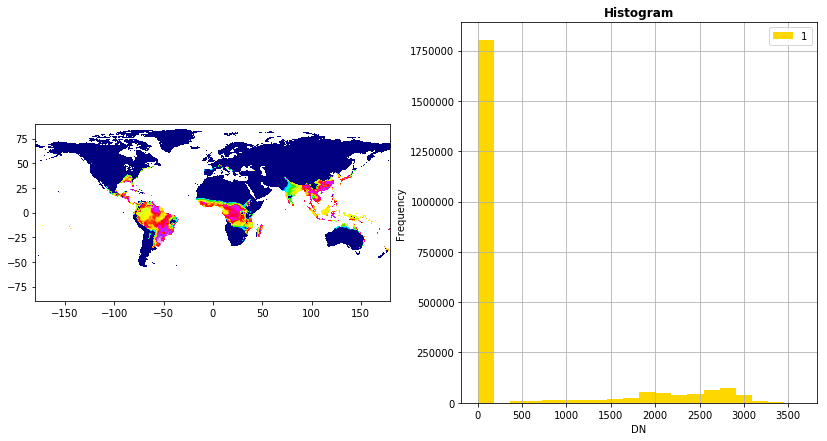

## res02_crav6190h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


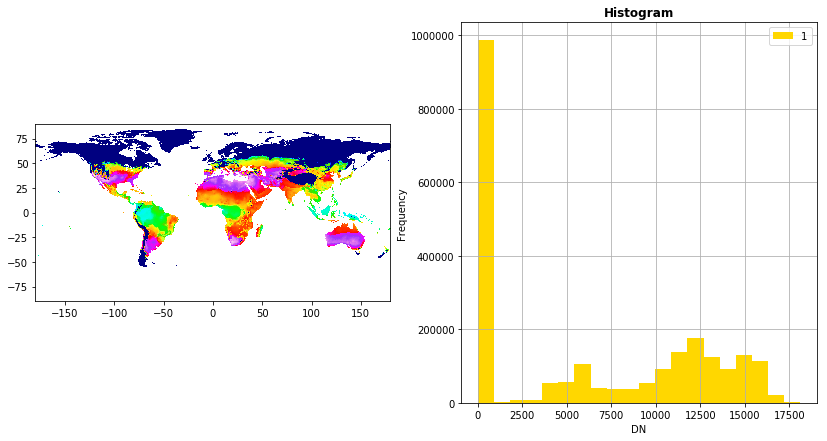

## res02_crav6190h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


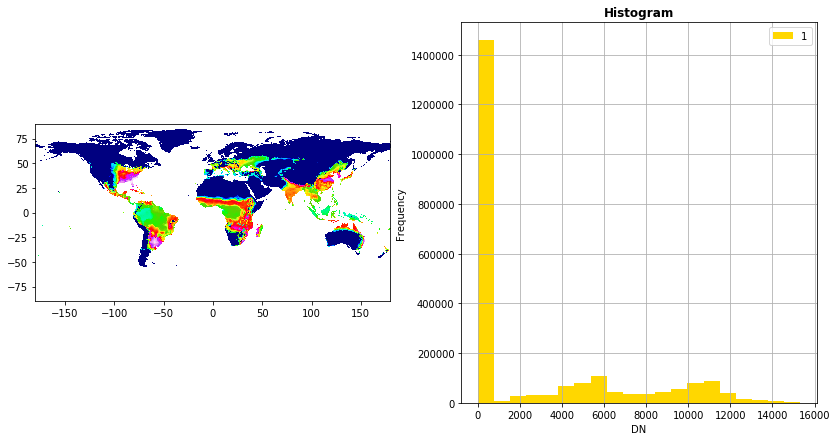

## res02_crav6190h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


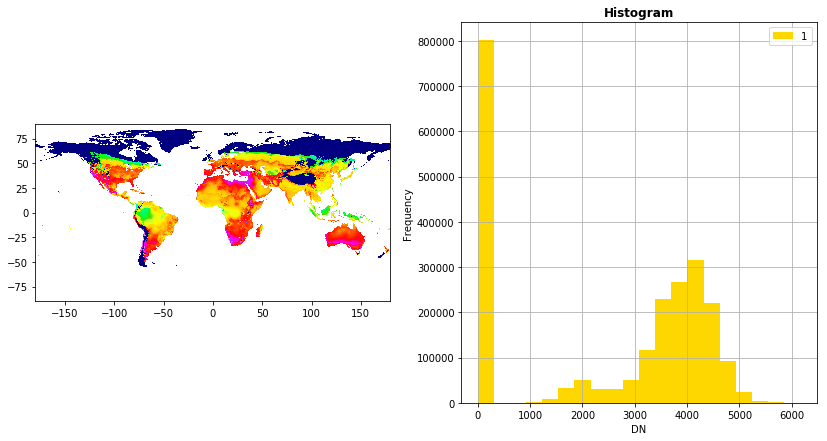

## res02_crav6190h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


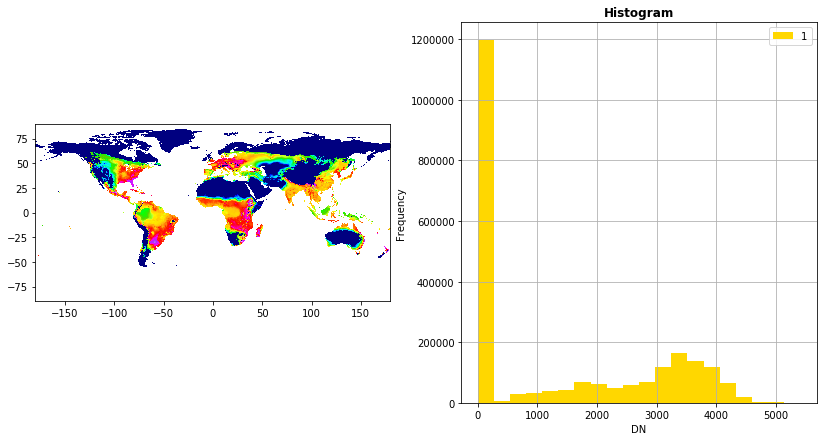

## res02_crav6190h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


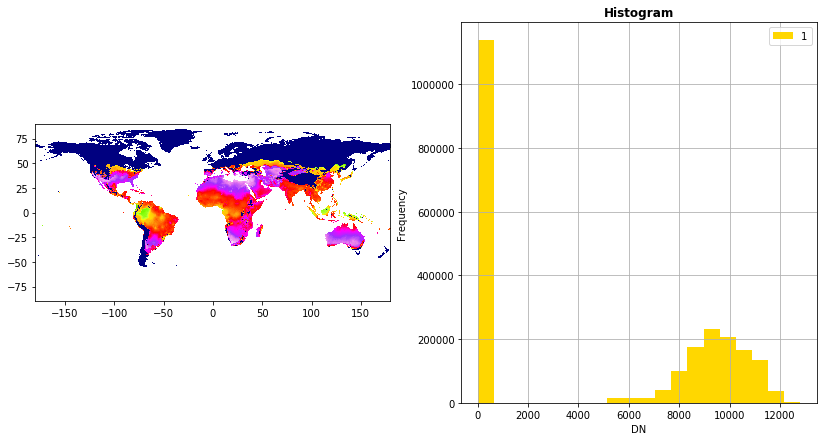

## res02_crav6190h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


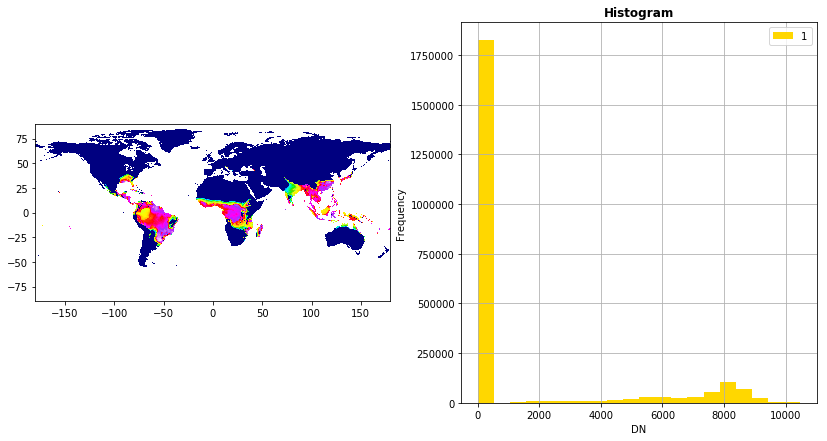

## res02_crav6190i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


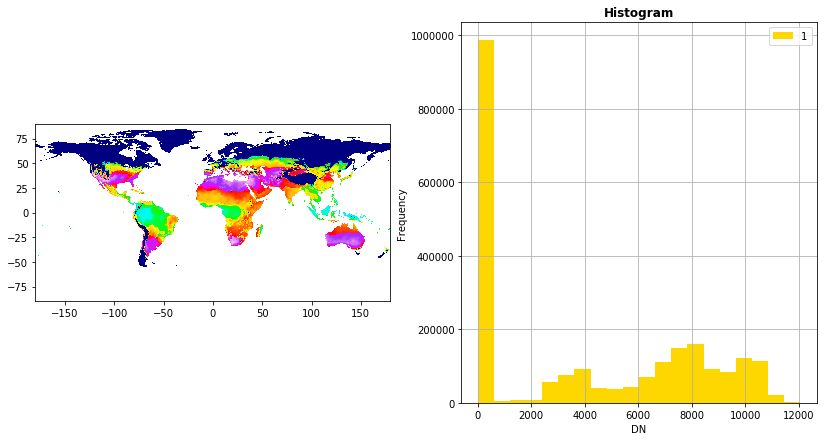

## res02_crav6190i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


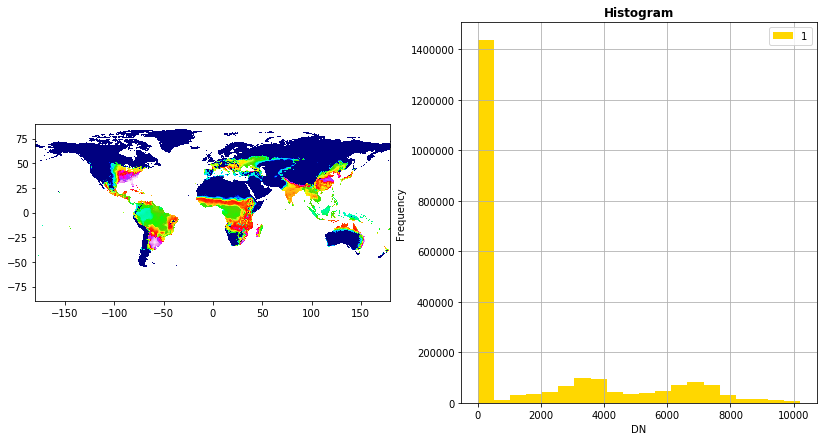

## res02_crav6190i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


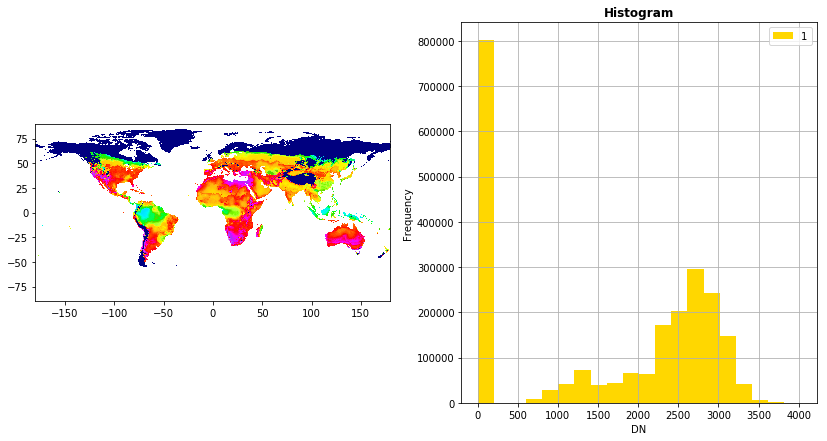

## res02_crav6190i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


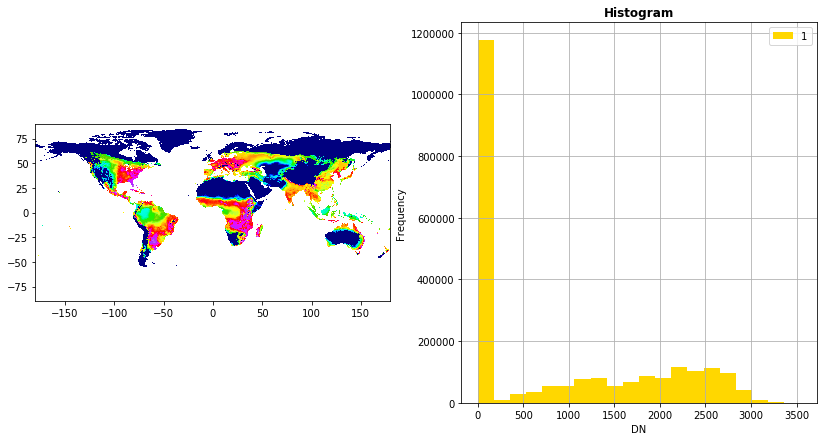

## res02_crav6190i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


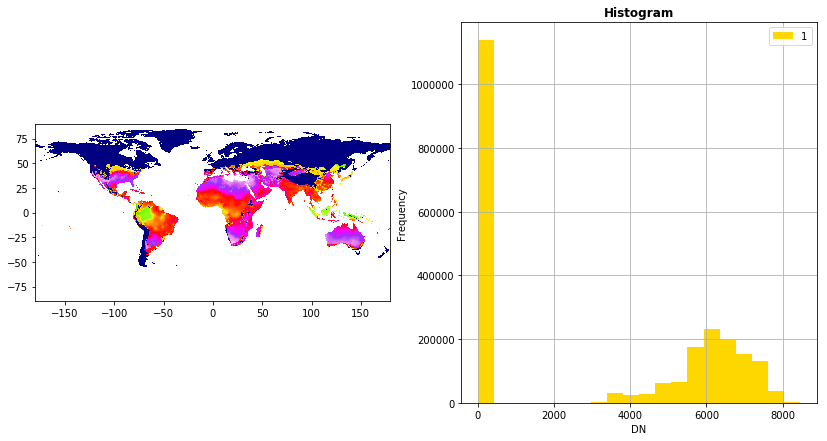

## res02_crav6190i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


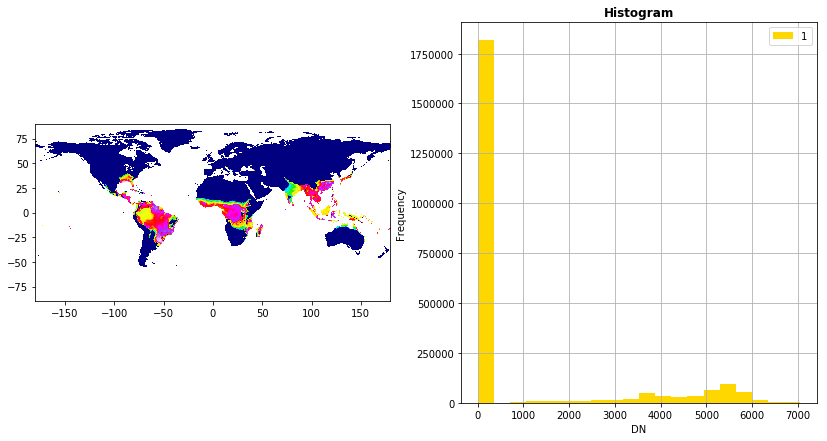

## res02_crav6190l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


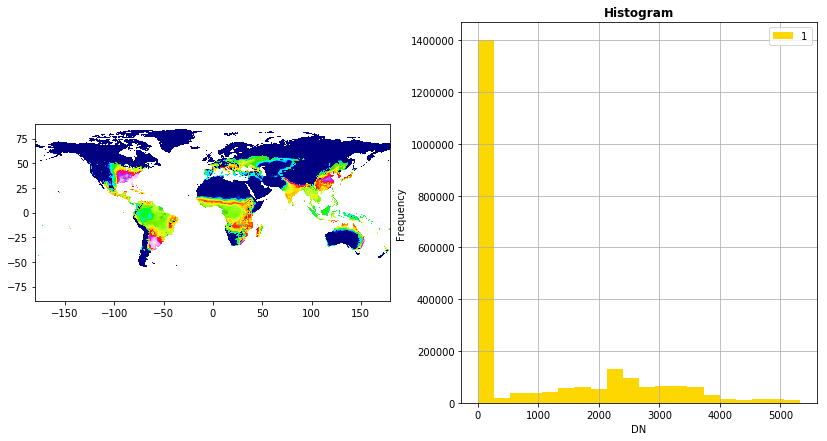

## res02_crav6190l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


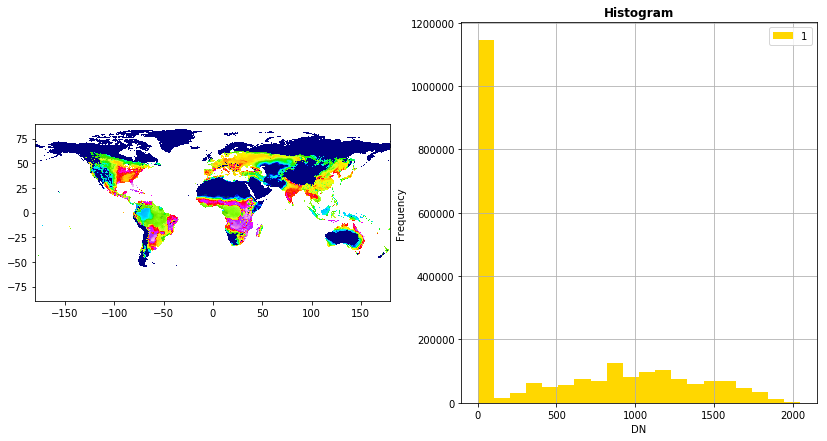

## res02_crav6190l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


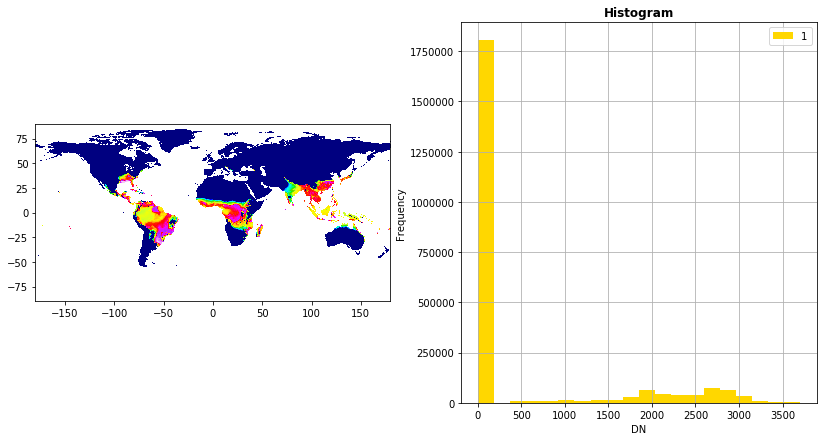

## res02_csa22020i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


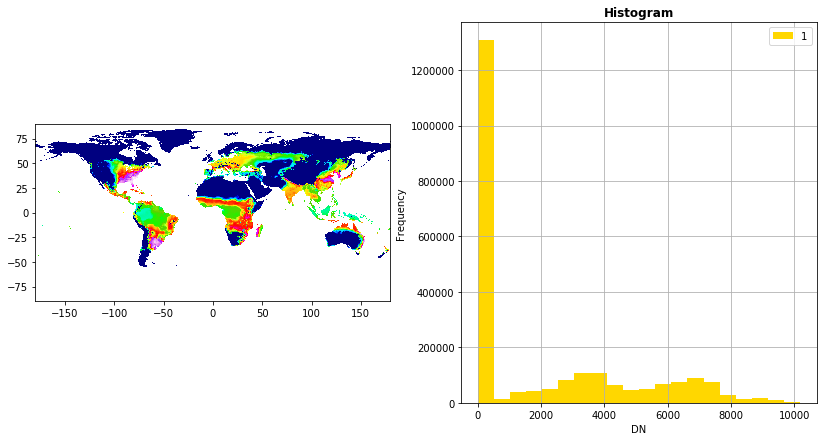

## res02_csa22020i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


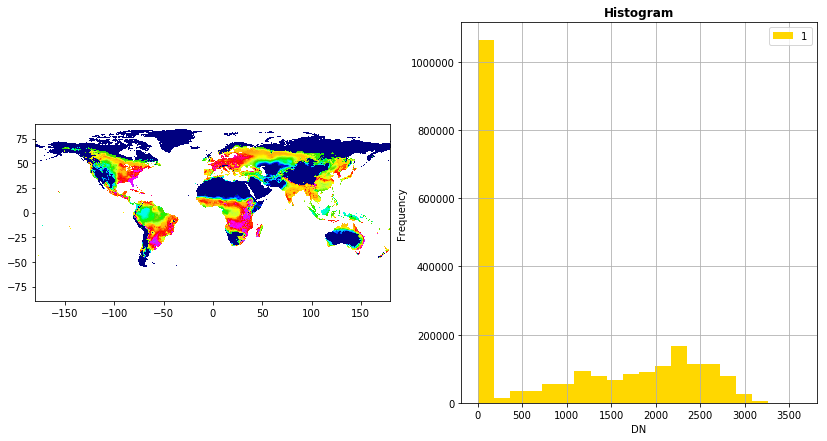

## res02_csa22020i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


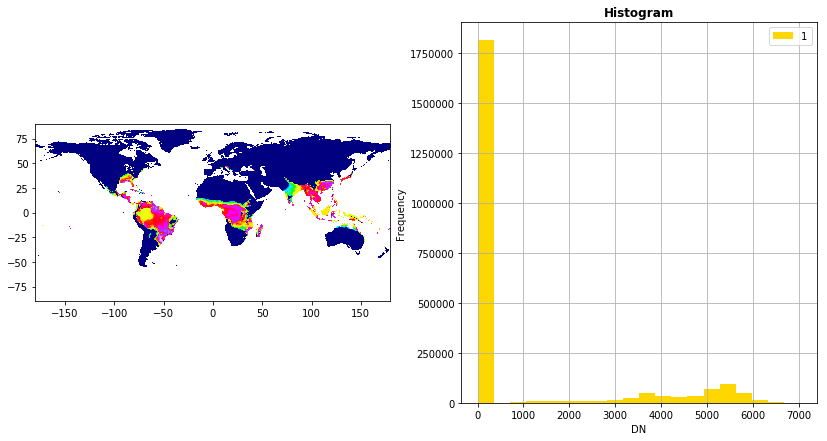

## res02_h3a22020h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


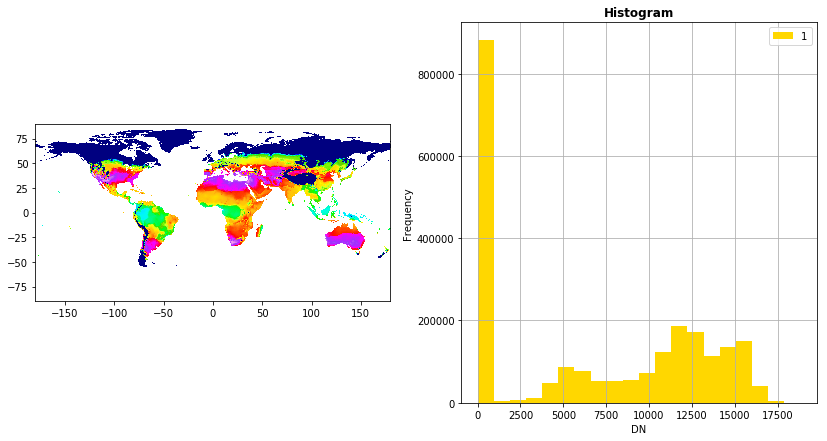

## res02_h3a22020h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


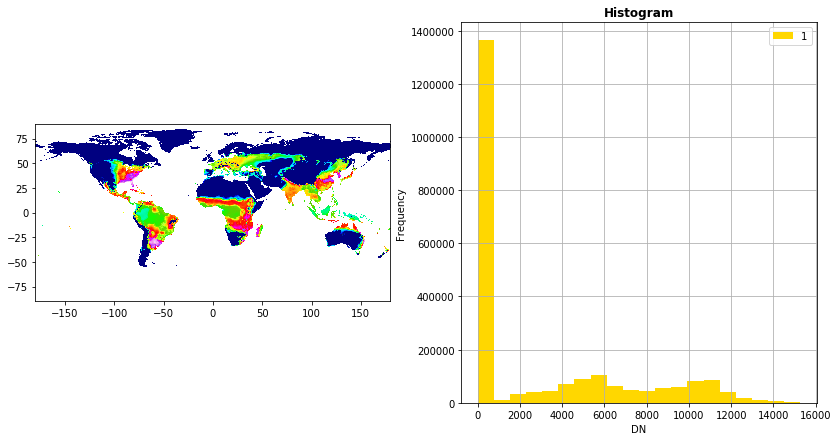

## res02_h3a22020h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


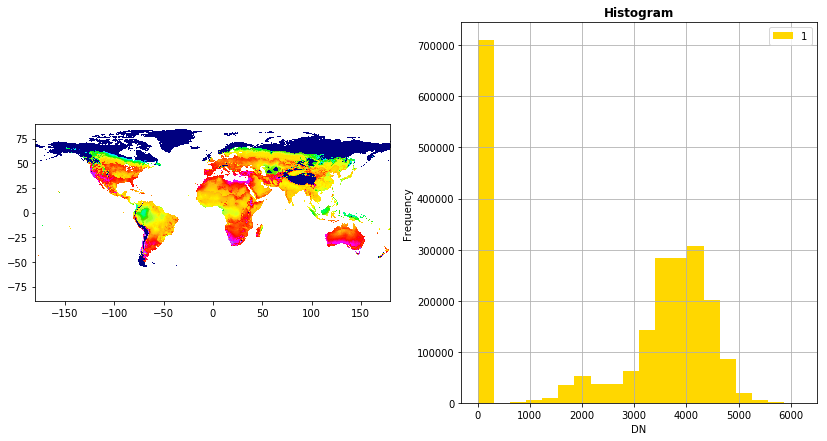

## res02_h3a22020h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


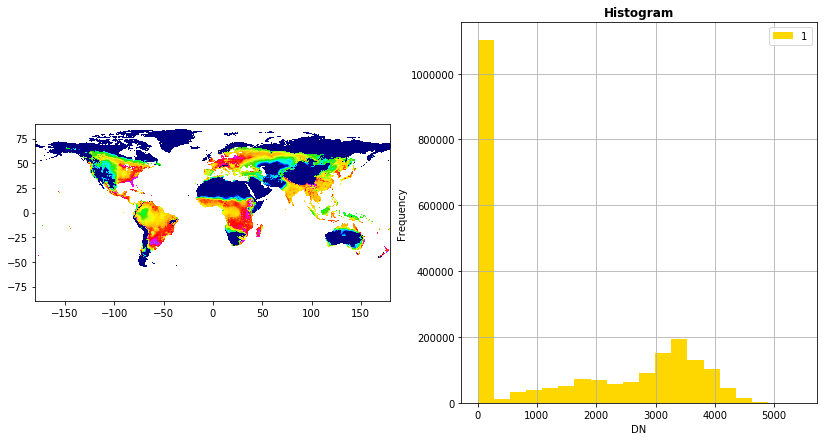

## res02_h3a22020h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


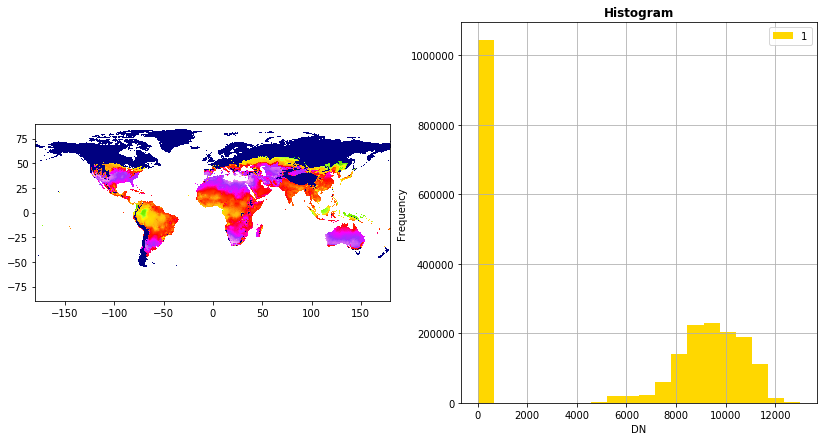

## res02_h3a22020h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


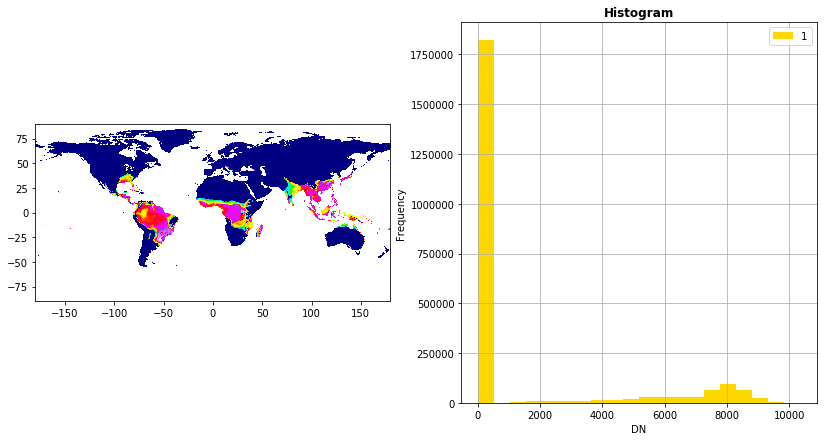

## res02_h3a22020i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


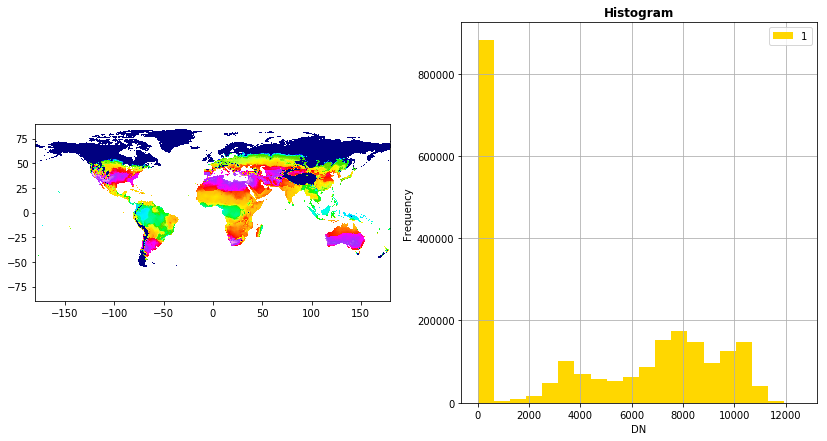

## res02_h3a22020i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


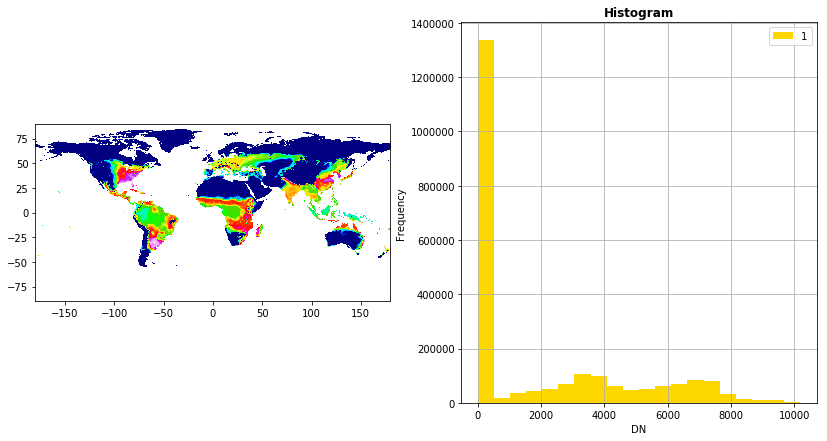

## res02_h3a22020i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


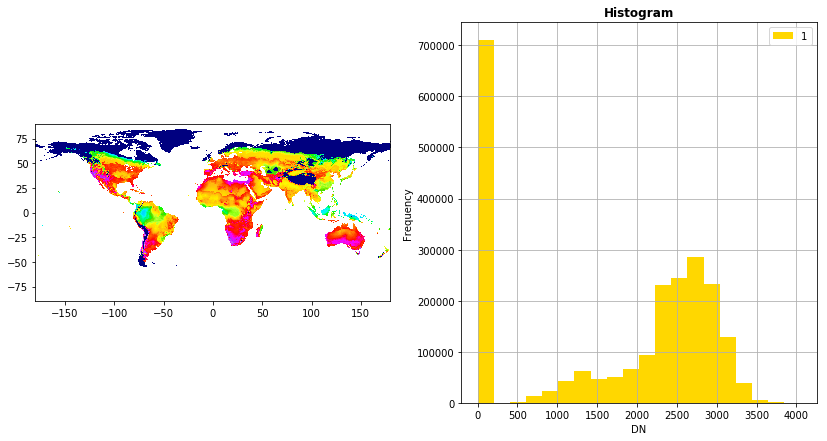

## res02_h3a22020i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


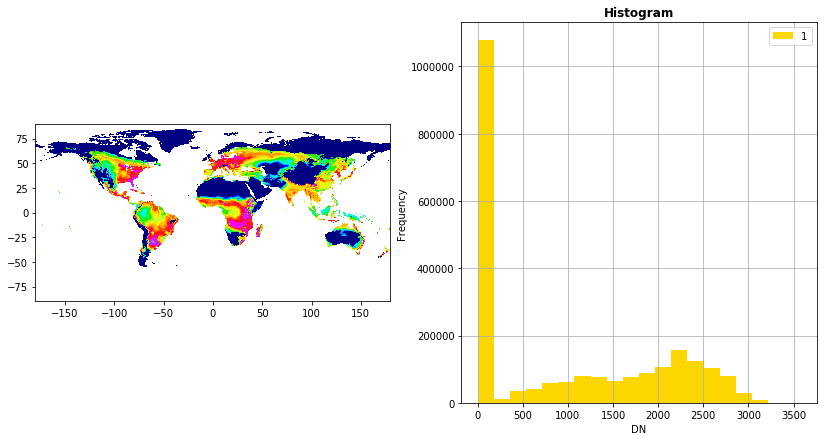

## res02_h3a22020i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


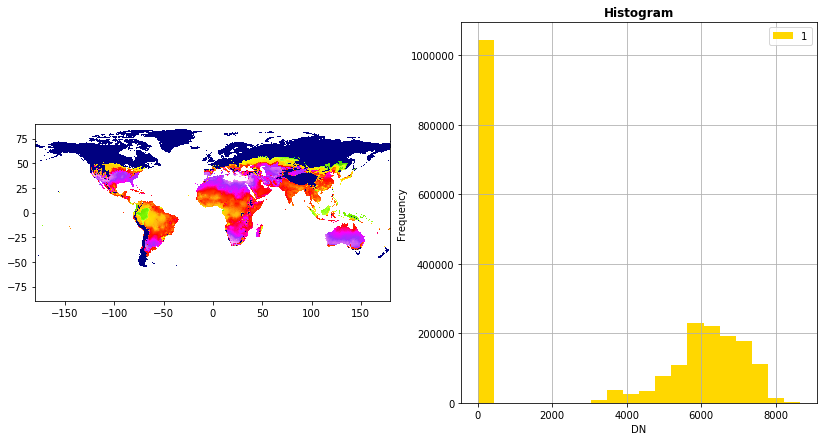

## res02_h3a22020i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22020l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


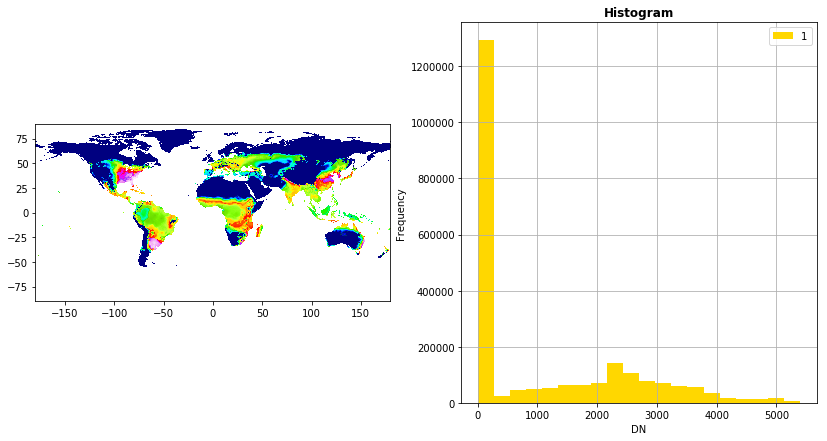

## res02_h3a22020l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 ..., 
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]]


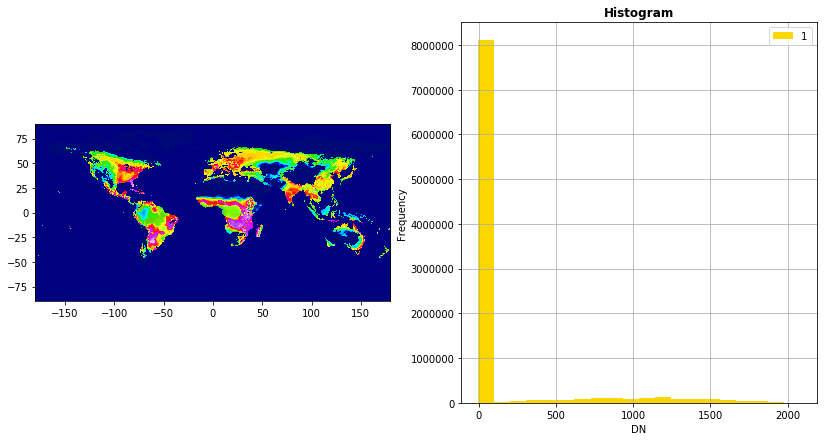

## res02_h3a22020l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020l_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


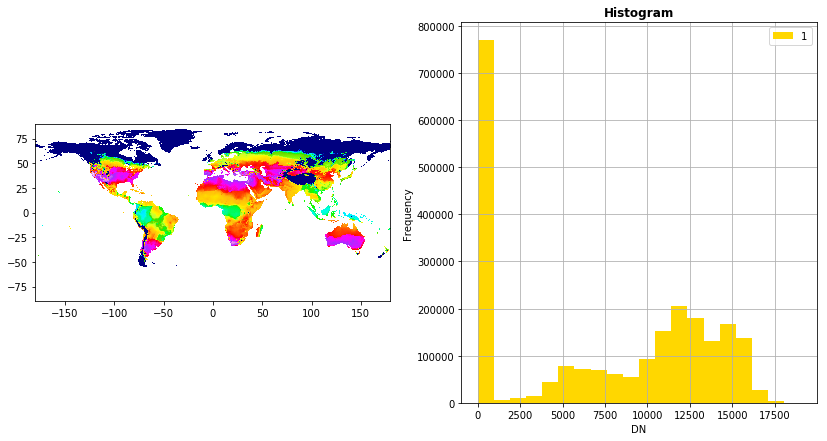

## res02_h3a22050h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


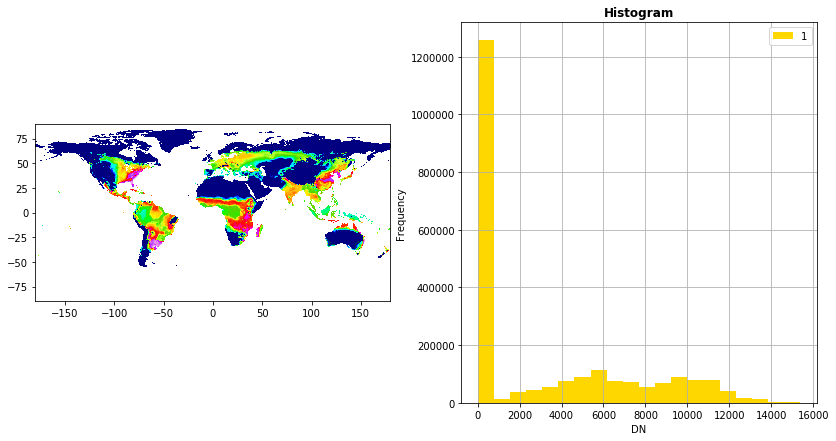

## res02_h3a22050h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


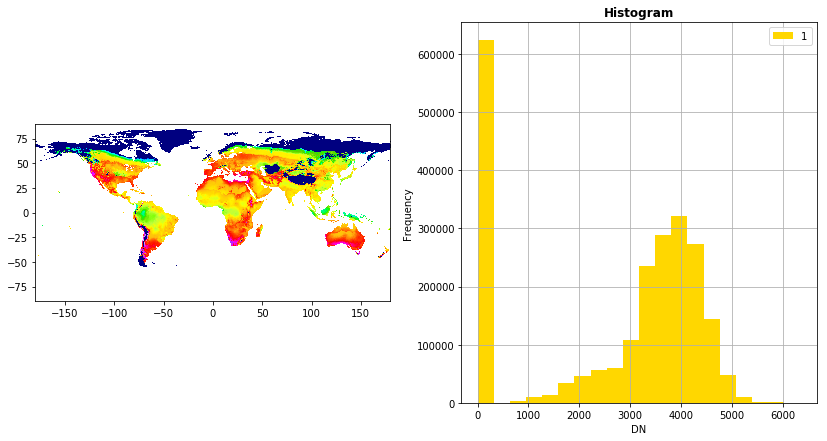

## res02_h3a22050h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


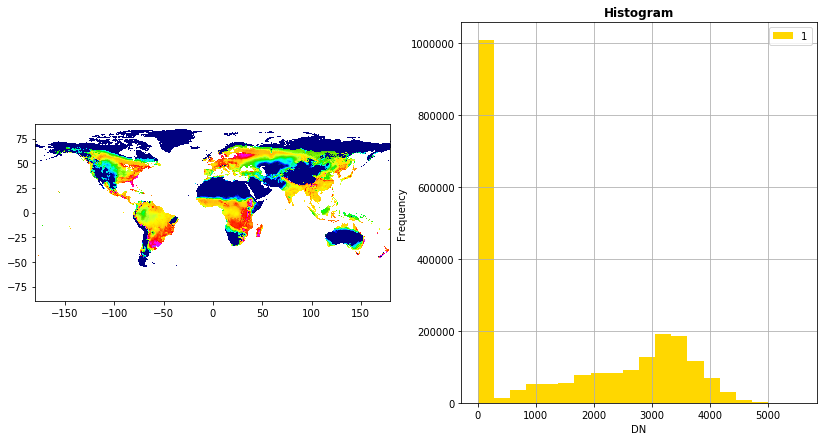

## res02_h3a22050h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22050h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


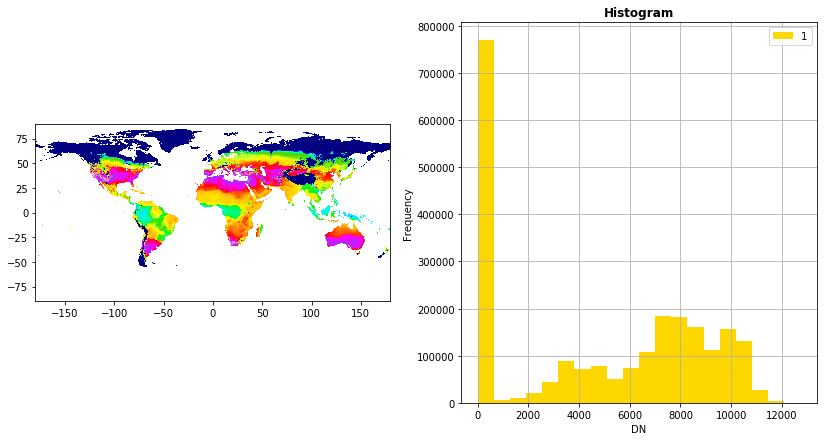

## res02_h3a22050i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


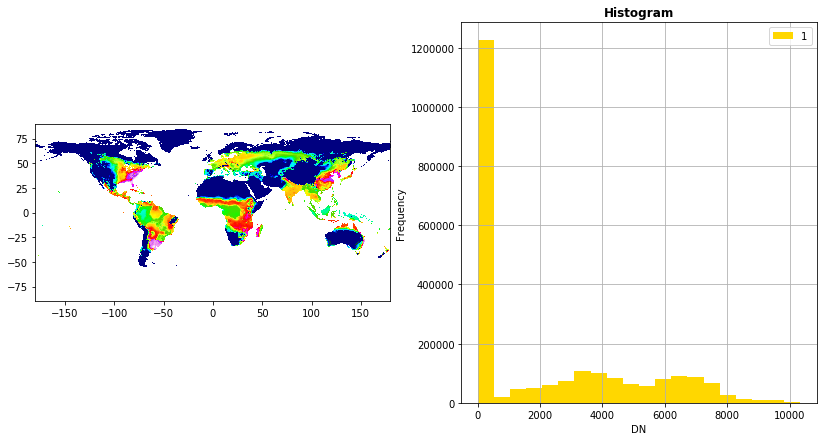

## res02_h3a22050i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


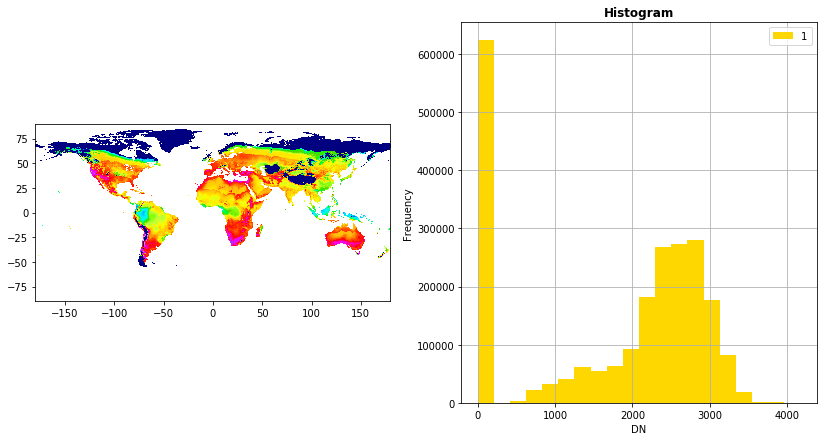

## res02_h3a22050i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


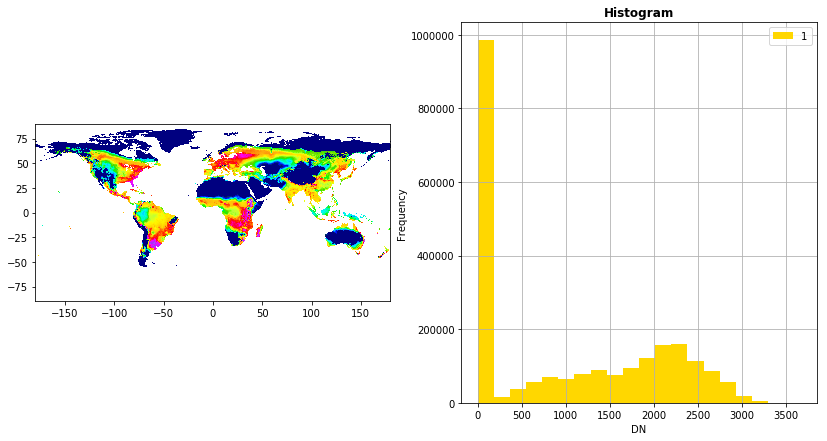

## res02_h3a22050i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


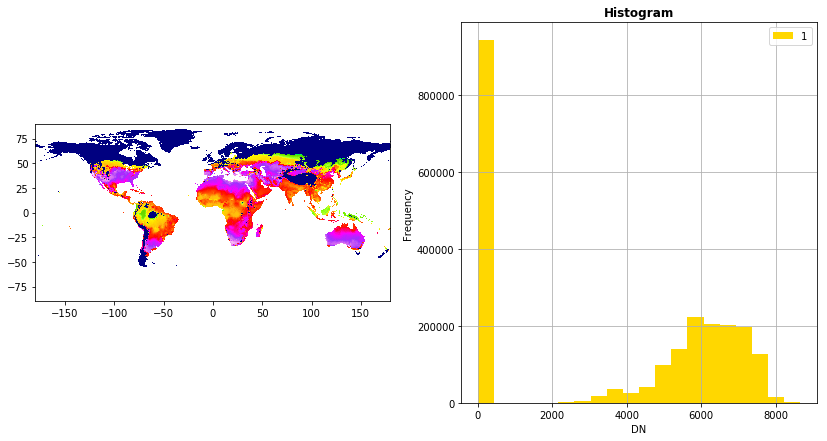

## res02_h3a22050i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


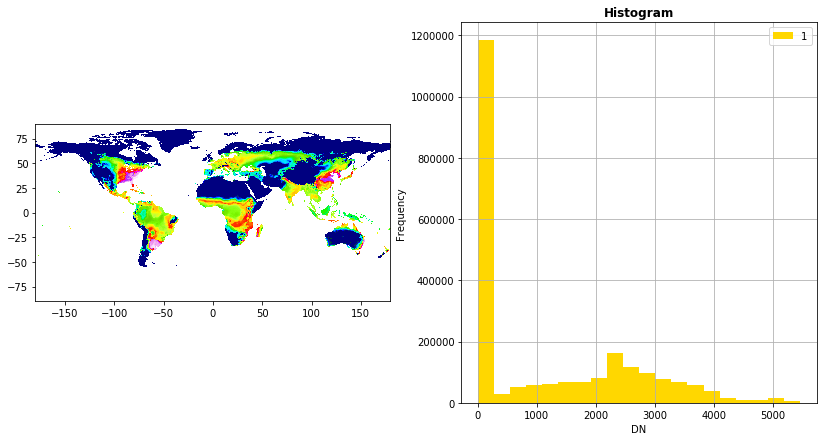

## res02_h3a22050l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 ..., 
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]]


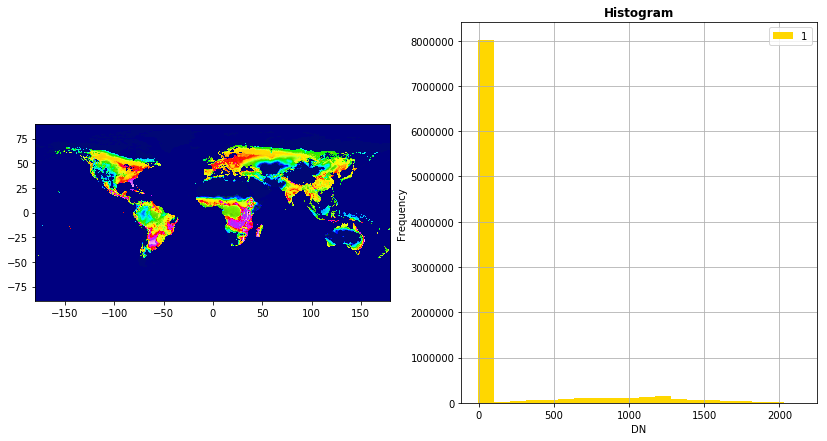

## res02_h3a22050l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050l_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080h_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


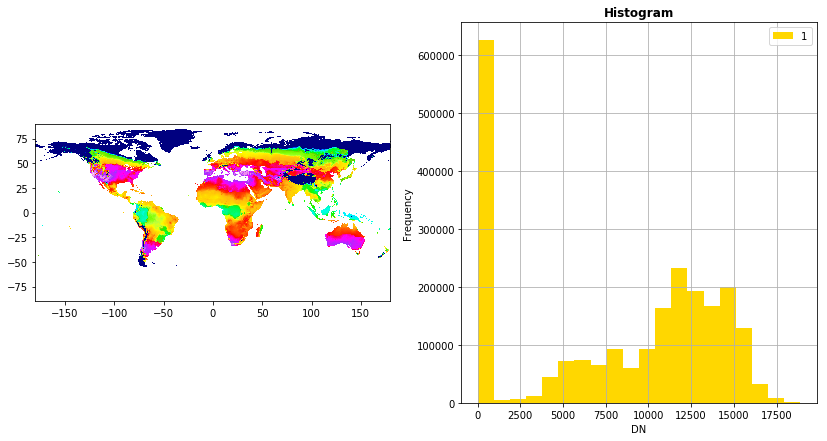

## res02_h3a22080h_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


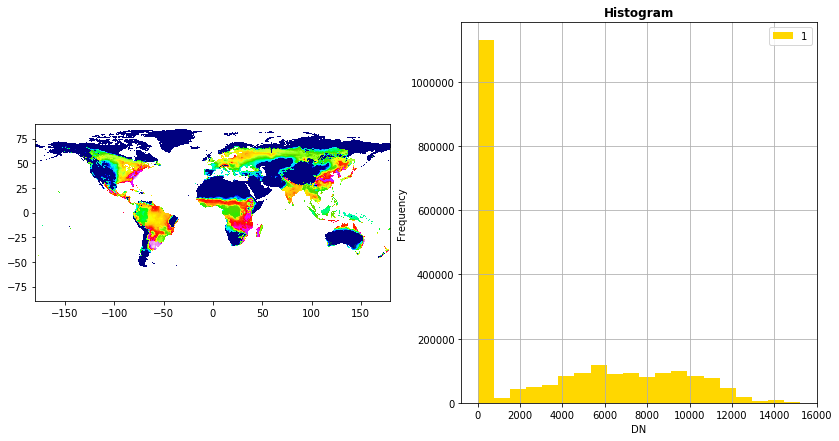

## res02_h3a22080h_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


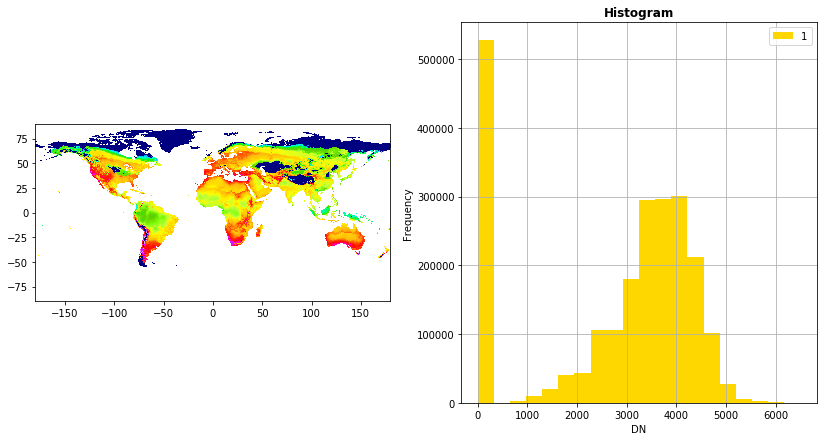

## res02_h3a22080h_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


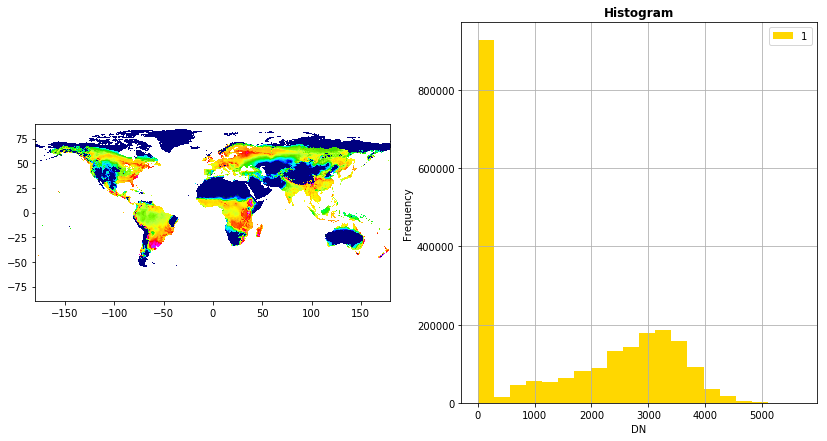

## res02_h3a22080h_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22080h_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080i_maiz000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


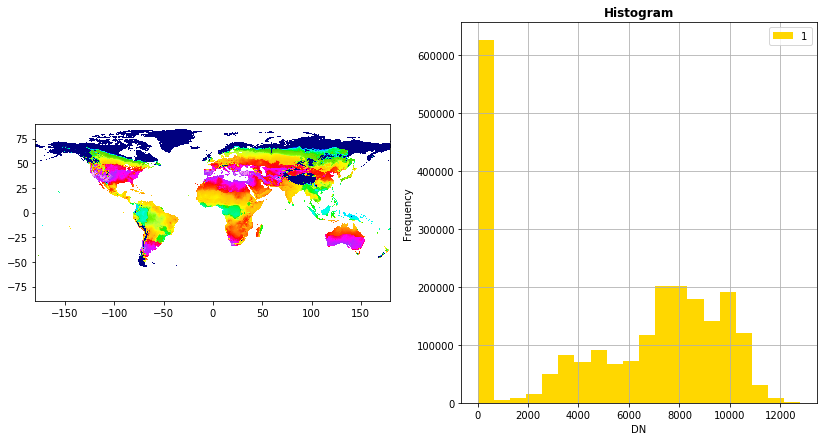

## res02_h3a22080i_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


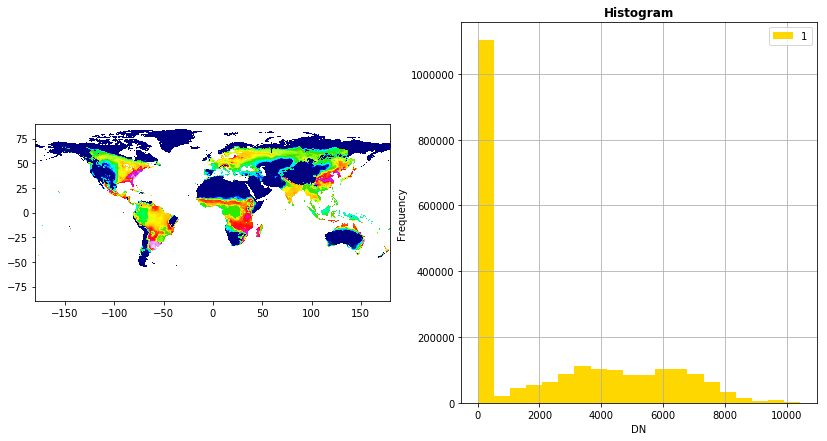

## res02_h3a22080i_puls000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


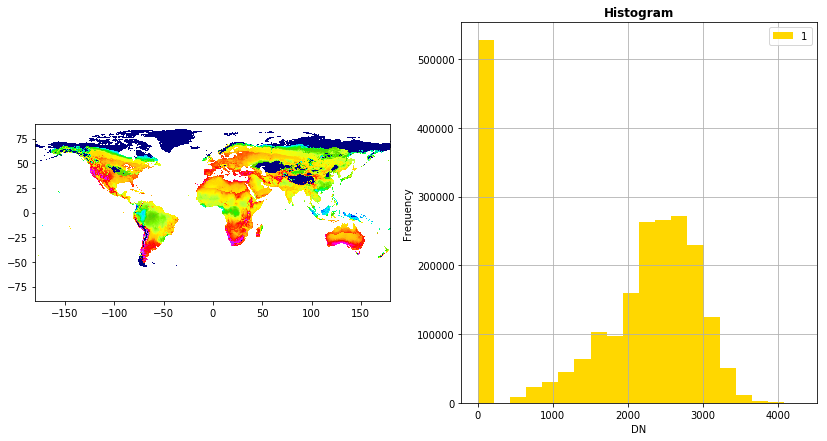

## res02_h3a22080i_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


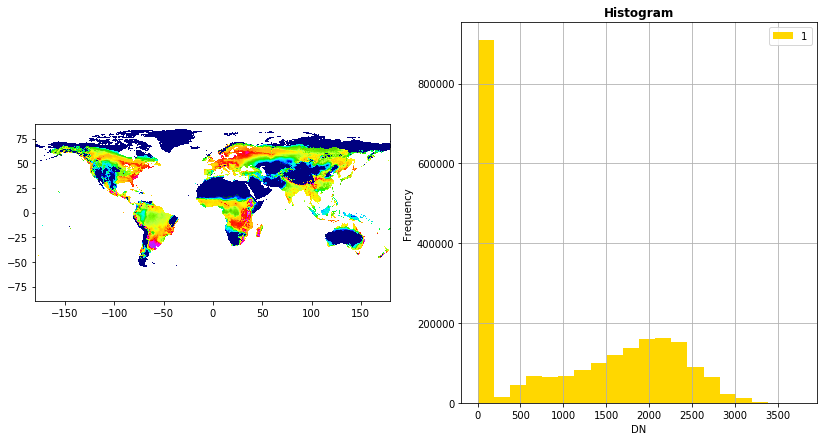

## res02_h3a22080i_ricw000a_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22080i_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080l_maiz150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


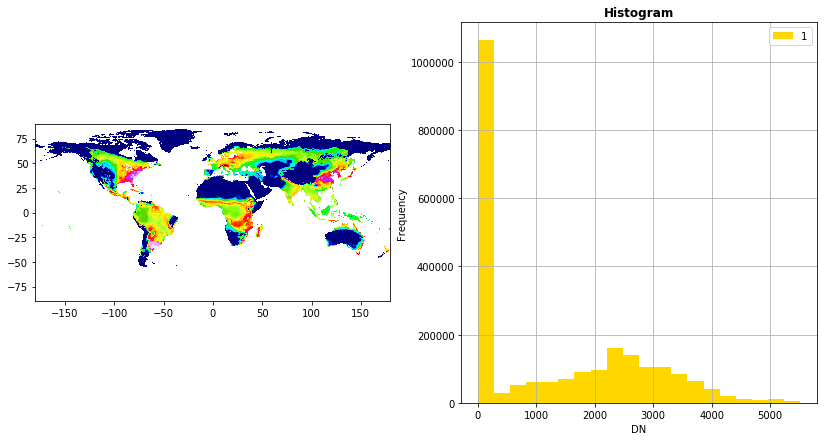

## res02_h3a22080l_puls150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 ..., 
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]
 [-9 -9 -9 ..., -9 -9 -9]]


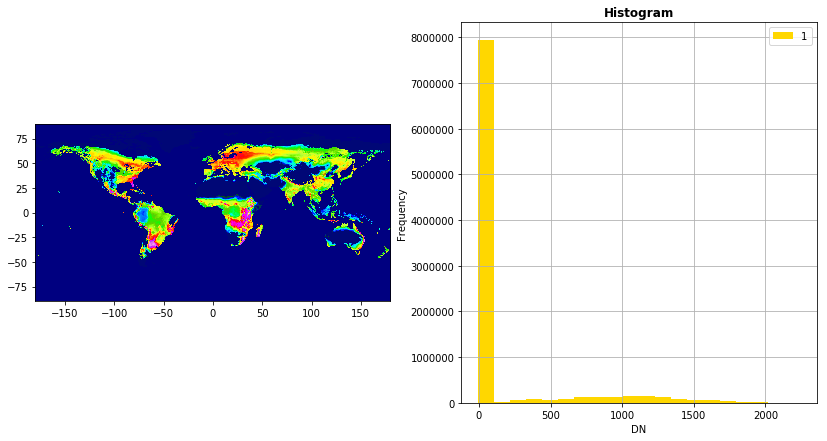

## res02_h3a22080l_ricw150b_yld.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080l_ricw150b_yld.tif' not recognized as a supported file format.


## rice_acy_cur.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


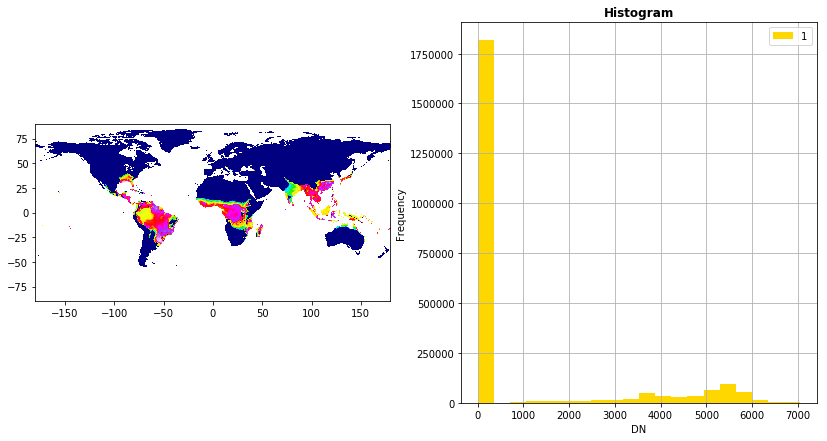

## rice_acy_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


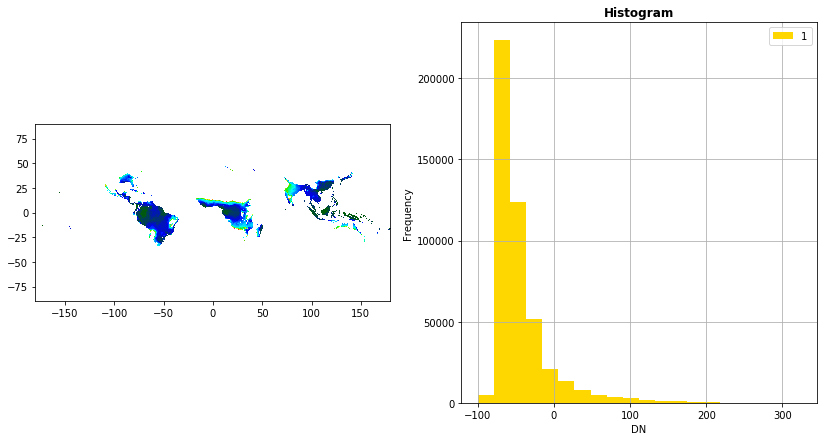

## rice_acy_fut.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


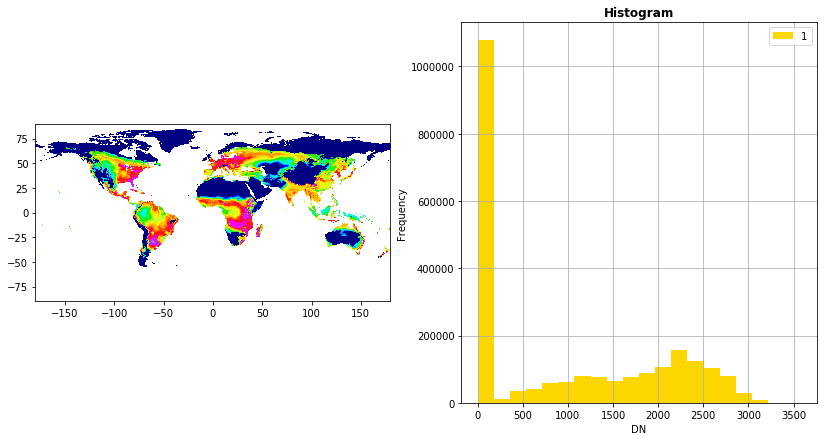

## rice_acy_r_h.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


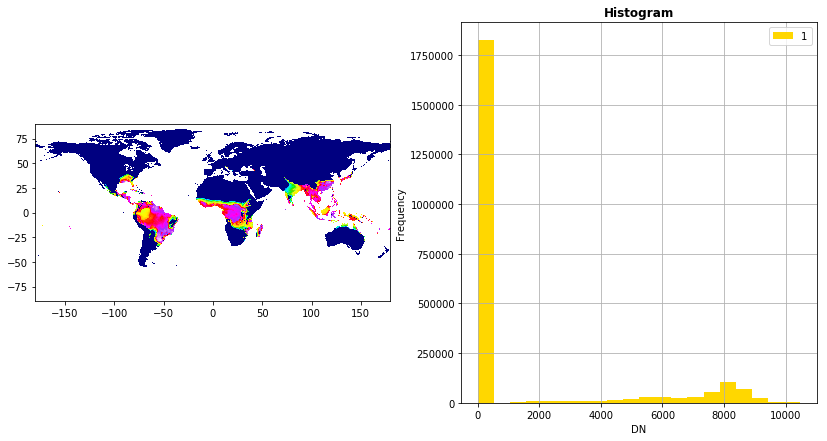

## rice_acy_r_l.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


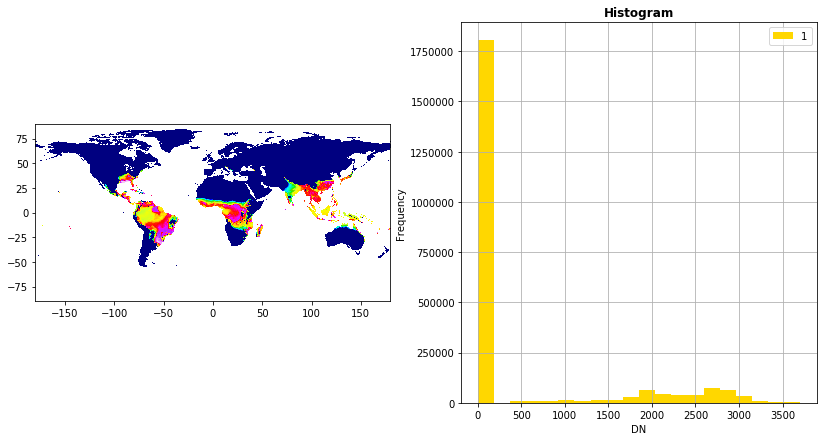

## rice_cur_i.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


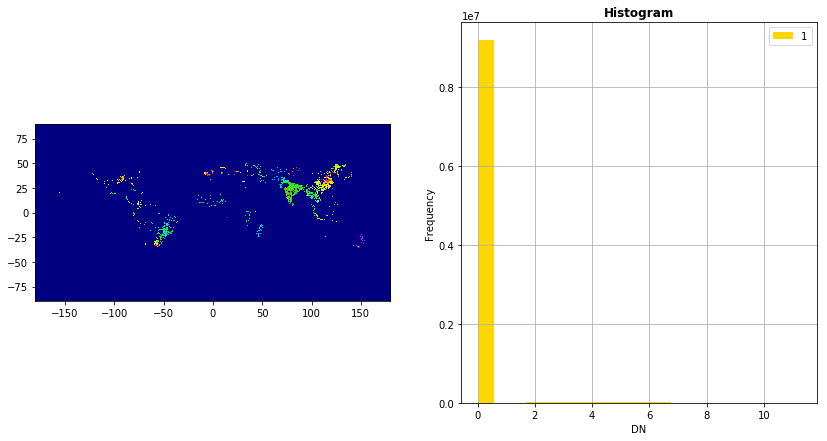

## rice_cur_r.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


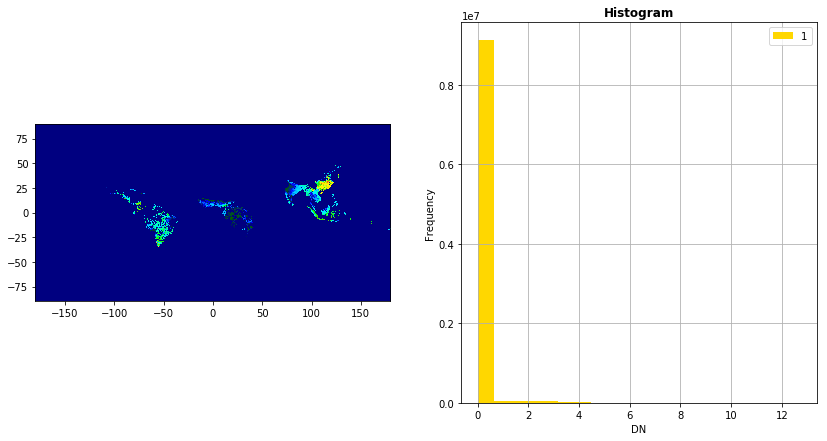

## rice_ygap_i_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


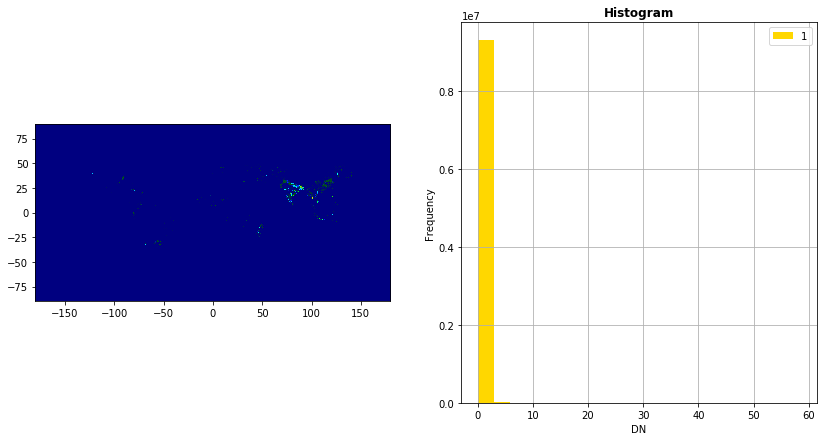

## rice_ygap_ir_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


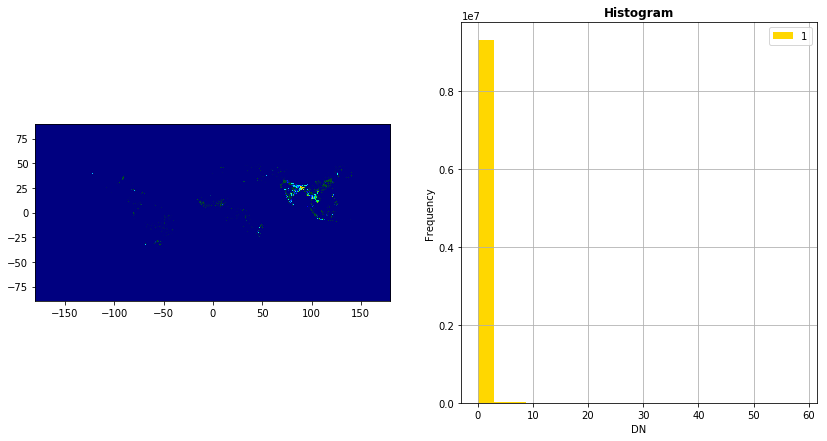

## rice_ygap_r_diff.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Land productivity']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]]


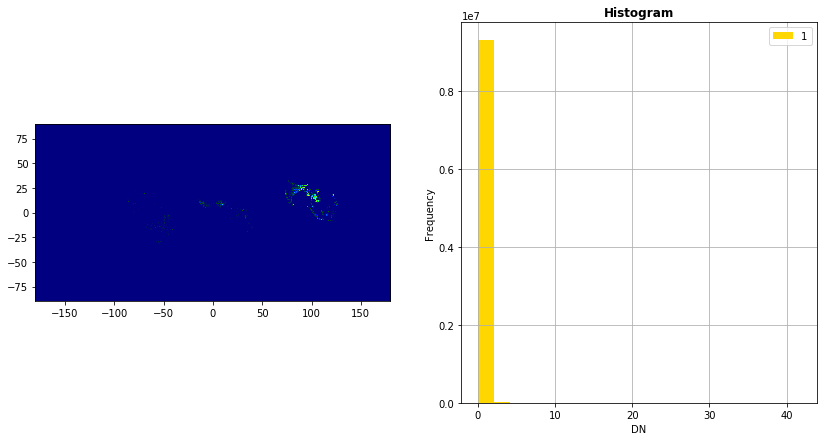

## TT_20K--SSA.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Market access', 'tt_20k--ssa.tif_3']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1177, 'height': 898, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333335135135136, 0.0, -25.499996675675675,
       0.0, -0.08333333333333334, 27.749996666666668), 'tiled': False, 'interleave': 'band'}```

BoundingBox(left=-25.499996675675675, bottom=-47.083336666666675, right=72.58335786486488, top=27.749996666666668)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


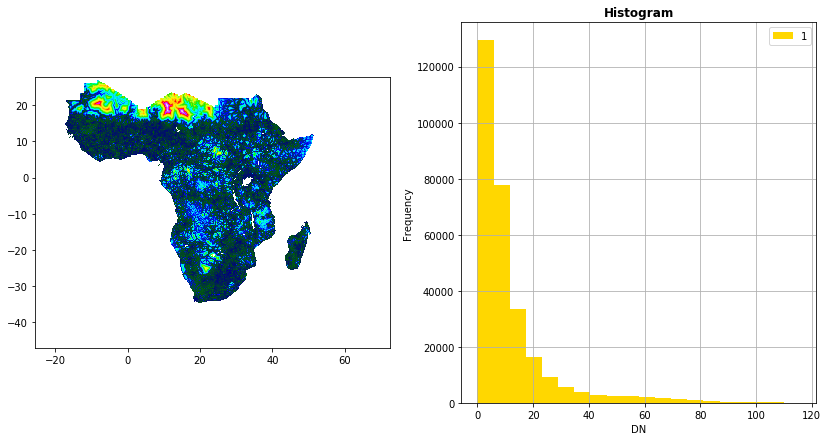

## gpw_v4_population_count_rev10_2015_2pt5_min.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Population distribution and growth', 'gpw-v4-population-count-rev10_2015_2pt5_min_tif']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


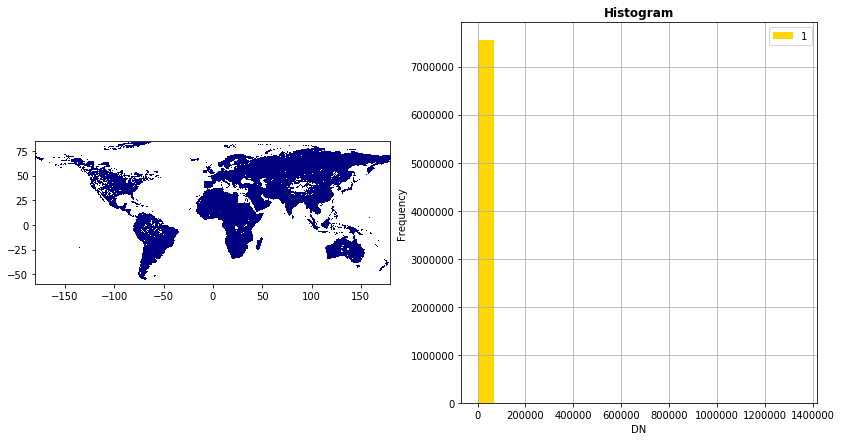

## gpw_v4_population_count_rev10_2020_2pt5_min.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Population distribution and growth', 'gpw-v4-population-count-rev10_2020_2pt5_min_tif']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


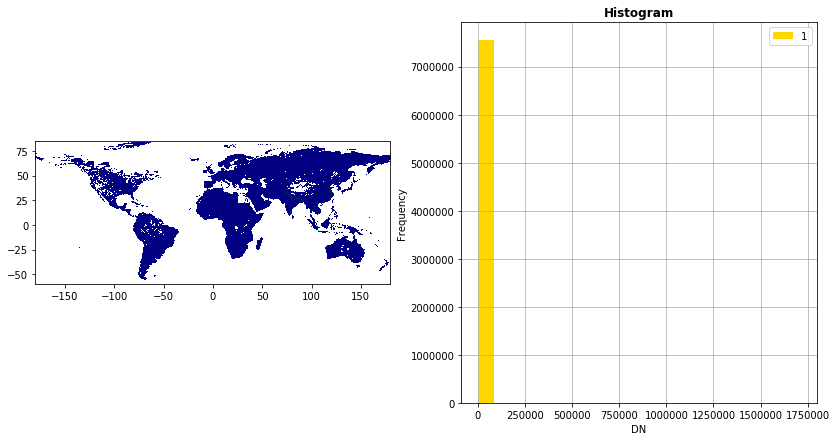

## gpw_v4_population_density_rev10_2015_2pt5_min.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Population distribution and growth', 'gpw-v4-population-density-rev10_2015_2pt5_min_tif']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


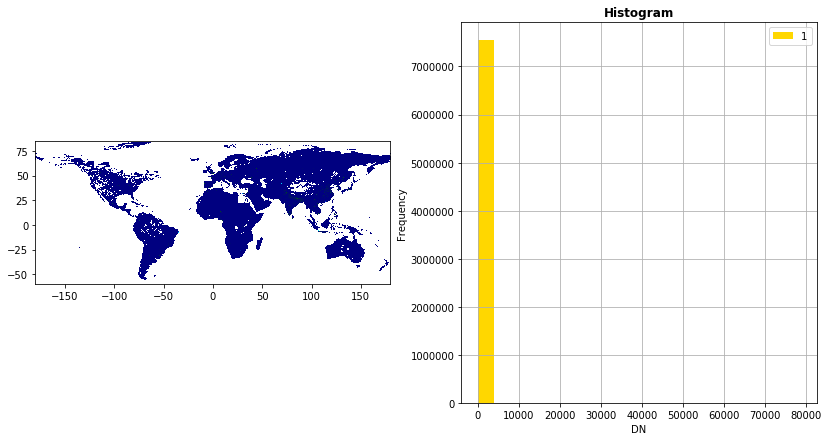

## gpw_v4_population_density_rev10_2020_2pt5_min.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Population distribution and growth']

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


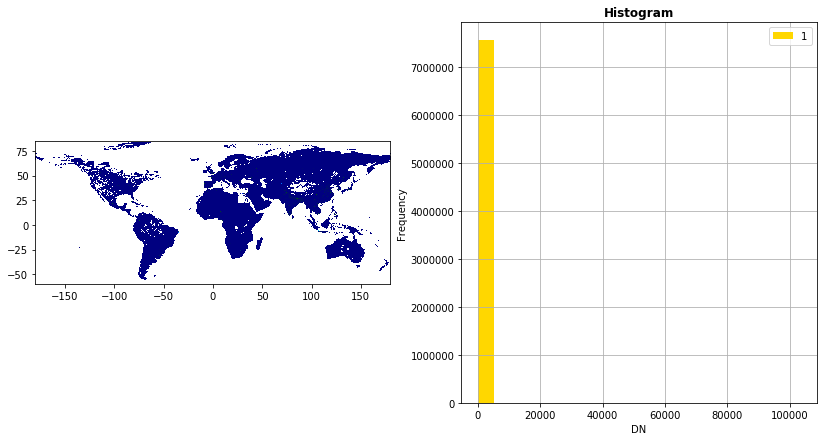

## CECSOL_M_sl1_10km_ll.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Soils']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3600, 'height': 1400, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.1, 0.0, -180.0,
       0.0, -0.1, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399999, right=180.0, top=83.99916720600001)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


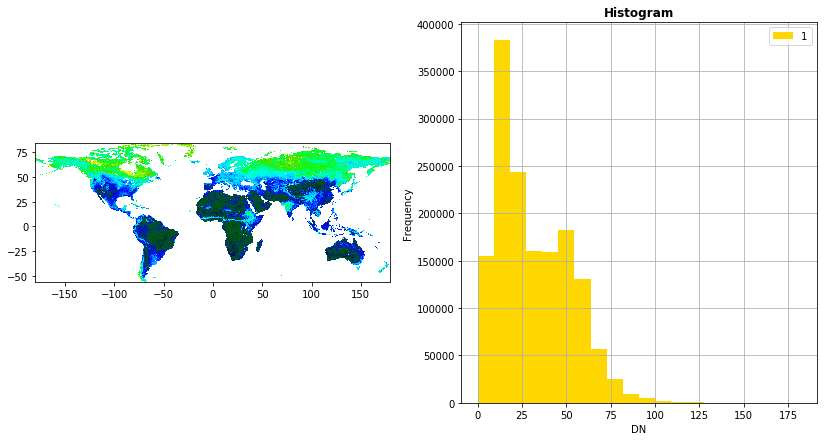

## CECSOL_M_sl1_1km_ll.tif

Located at: ['', 'Users', 'alicia', 'Projects', 'jupyter-geotools-alpine', 'work', 'data', 'resilience_test', 'Intensification', 'Soils']

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 43200, 'height': 16800, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00833333333333333, 0.0, -180.0,
       0.0, -0.00833333333333333, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399993, right=179.99999999999983, top=83.99916720600001)
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


In [ ]:
infoData=[]
for image in patsData:
    if 'tif' in image.split('/')[-1].split('.')[-1]:
        display(Markdown('## {0}'.format(image.split('/')[-1])))
        display(Markdown('Located at: {0}'.format(image.split('/')[:-1])))
        profileD = windowed_view(image)
        infoData.append(profileD)
        

In [6]:
infoData=[]
for image in patsData:
    if 'tif' in image.split('/')[-1].split('.')[-1]:
        display(Markdown('## {0}'.format(image.split('/')[-1])))
        profileD = dataView(image)
        infoData.append(profileD)

## act2000_i_mze_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_i_pls_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_i_rcw_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_r_mze_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_r_pls_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_r_rcw_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_t_mze_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_t_pls_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## act2000_t_rcw_2000_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_mze_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_mze_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_pls_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_pls_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_rcw_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_i_rcw_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_mze_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_mze_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_pls_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_pls_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_rcw_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_r_rcw_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_mze_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_mze_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_pls_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_pls_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_rcw_2000_qga.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## gap2000_t_rcw_2000_yga_cl.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_acy_cur.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_acy_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_acy_fut.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_acy_r_h.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_acy_r_l.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_cur_i.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_cur_r.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_ygap_i_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_ygap_ir_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## maize_ygap_r_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_acy_cur.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_acy_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_acy_fut.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_acy_r_h.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_acy_r_l.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_cur_i.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_cur_r.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_ygap_i_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_ygap_ir_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## pulses_ygap_r_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020h_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22020h_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020i_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22020i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22020i_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22020l_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050h_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050i_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22050l_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080h_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080i_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_c2a22080i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_c2a22080i_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_c2a22080l_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190h_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190i_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_crav6190l_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_csa22020i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_csa22020i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_csa22020i_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020h_ricw150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020i_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22020l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22020l_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22020l_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050h_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22050h_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050h_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050i_ricw000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050i_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22050l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22050l_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22050l_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080h_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080h_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080h_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080h_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080h_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22080h_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080h_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080i_maiz000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080i_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080i_puls000a_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080i_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080i_ricw000a_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw000a_yld.tif' not recognized as a supported file format.


## res02_h3a22080i_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080i_ricw150b_yld.tif' not recognized as a supported file format.


## res02_h3a22080l_maiz150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9.0, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080l_puls150b_yld.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## res02_h3a22080l_ricw150b_yld.tif

Error ocurred while trying to open the selected file
'/Users/alicia/Projects/jupyter-geotools-alpine/work/data/resilience_test/Intensification/Land productivity/res02_h3a22080l_ricw150b_yld.tif' not recognized as a supported file format.


## rice_acy_cur.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_acy_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_acy_fut.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_acy_r_h.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_acy_r_l.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_cur_i.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_cur_r.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_ygap_i_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_ygap_ir_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## rice_ygap_r_diff.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


## TT_20K--SSA.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1177, 'height': 898, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.08333335135135136, 0.0, -25.499996675675675,
       0.0, -0.08333333333333334, 27.749996666666668), 'tiled': False, 'interleave': 'band'}```

BoundingBox(left=-25.499996675675675, bottom=-47.083336666666675, right=72.58335786486488, top=27.749996666666668)


## gpw_v4_population_count_rev10_2015_2pt5_min.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)


## gpw_v4_population_count_rev10_2020_2pt5_min.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)


## gpw_v4_population_density_rev10_2015_2pt5_min.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)


## gpw_v4_population_density_rev10_2020_2pt5_min.tif

```json 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 8640, 'height': 3480, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0416666666666643, 0.0, -180.0,
       0.0, -0.0416666666666643, 84.99999999999176), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-60.0, right=179.99999999997954, top=84.99999999999176)


## CECSOL_M_sl1_10km_ll.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3600, 'height': 1400, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.1, 0.0, -180.0,
       0.0, -0.1, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399999, right=180.0, top=83.99916720600001)


## CECSOL_M_sl1_1km_ll.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 43200, 'height': 16800, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00833333333333333, 0.0, -180.0,
       0.0, -0.00833333333333333, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399993, right=179.99999999999983, top=83.99916720600001)


## K_M_agg35cm_AF_250m.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS({'proj': 'aeqd', 'lat_0': 8.5, 'lon_0': 21.5, 'x_0': 5621452.01998, 'y_0': 5990638.42298, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}), 'transform': Affine(250.00000000000003, 0.0, 600000.0,
       0.0, -250.00000000000003, 9400000.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=600000.0, bottom=399999.99999999814, right=9600000.000000002, top=9400000.0)


## N_M_agg30cm_AF_250m.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 32542, 'height': 27724, 'count': 1, 'crs': CRS({'proj': 'laea', 'lat_0': 5, 'lon_0': 20, 'x_0': 0, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}), 'transform': Affine(249.99999999999997, 0.0, -4729500.0,
       0.0, -249.99999999999997, 2602500.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-4729500.0, bottom=-4328499.999999999, right=3405999.999999999, top=2602500.0)


## P.T_M_agg35cm_AF_250m.tif

```json 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS({'proj': 'aeqd', 'lat_0': 8.5, 'lon_0': 21.5, 'x_0': 5621452.01998, 'y_0': 5990638.42298, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}), 'transform': Affine(250.00000000000003, 0.0, 600000.0,
       0.0, -250.00000000000003, 9400000.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=600000.0, bottom=399999.99999999814, right=9600000.000000002, top=9400000.0)


## PHIHOX_M_sl1_10km_ll.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 3600, 'height': 1400, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.1, 0.0, -180.0,
       0.0, -0.1, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399999, right=180.0, top=83.99916720600001)


## PHIHOX_M_sl1_1km_ll.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 43200, 'height': 16800, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00833333333333333, 0.0, -180.0,
       0.0, -0.00833333333333333, 83.99916720600001), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-56.00083279399993, right=179.99999999999983, top=83.99916720600001)


## PHIHOX_M_sl1_250m_ll.tif

```json 
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 172800, 'height': 71698, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.002083333, 0.0, -180.0,
       0.0, -0.002083333, 87.37), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}```

BoundingBox(left=-180.0, bottom=-62.00080943400002, right=179.9999424, top=87.37)


In [14]:
list2filt=["Maize_acy_diff.tif",
"maize_ygap_r_diff.tif",
"maize_ygap_i_diff.tif",
"maize_ygap_ir_diff.tif",
"Maize_cur_r.tif",
"Maize_acy_fut.tif",
"Maize_cur_r.tif",
"Maize_cur_r.tif",
"Maize_acy_r_h.tif",
"Maize_acy_r_l.tif",
"PHIHOX_M_sl1_1km_ll.tif",
"CECSOL_M_sl1_1km_ll.tif",
"TT_20K—SSA.tif",
"gpw_v4_population_density_rev10_2020_2pt5_min.tif",
"WDPA_May2018-shapefile-polygons.shp",
"CN_NUTS_C_HA2",
"CN_NUTS_C_WA2",
"CN_NUTS_C_WH2"  
]
len(list2filt)

18

In [13]:
filteredInfoData=[data for data in infoData if data['fileName'].split('/')[-1] in list2filt]

print(len(filteredInfoData))

      
      
#for data in infoData:
#        print(data['fileName'].split('/')[-1])
#        break

6


In [7]:
for data in infoData:
    if not isinstance(data, dict):
        print(data)

In [8]:
#dataFD = pd.DataFrame(infoData)
dataFD =pd.DataFrame.from_records(infoData)
dataFD.to_csv('output.csv')
dataFD.head()

blockxsize  blockysize                        bounds compress  count  \
0       256.0       256.0  (-180.0, -90.0, 180.0, 90.0)      lzw    1.0   
1       256.0       256.0  (-180.0, -90.0, 180.0, 90.0)      lzw    1.0   
2       256.0       256.0  (-180.0, -90.0, 180.0, 90.0)      lzw    1.0   
3       256.0       256.0  (-180.0, -90.0, 180.0, 90.0)      lzw    1.0   
4       256.0       256.0  (-180.0, -90.0, 180.0, 90.0)      lzw    1.0   

      crs driver    dtype                                           fileName  \
0  [init]  GTiff  float32  /Users/alicia/Projects/jupyter-geotools-alpine...   
1  [init]  GTiff  float32  /Users/alicia/Projects/jupyter-geotools-alpine...   
2  [init]  GTiff  float32  /Users/alicia/Projects/jupyter-geotools-alpine...   
3  [init]  GTiff  float32  /Users/alicia/Projects/jupyter-geotools-alpine...   
4  [init]  GTiff  float32  /Users/alicia/Projects/jupyter-geotools-alpine...   

   height interleave  nodata                                   pixelSize  \
0  2160.0       band    -9.0  [0.08333333333333333, 0.08333333333333333]   
1  2160.0       band    -9.0  [0.08333333333333333, 0.08333333333333333]   
2  2160.0       band    -9.0  [0.08333333333333333, 0.08333333333333333]   
3  2160.0       band    -9.0  [0.08333333333333333, 0.08333333333333333]   
4  2160.0       band    -9.0  [0.08333333333333333, 0.08333333333333333]   

  tiled                                          transform   width  
0  True  (0.08333333333333333, 0.0, -180.0, 0.0, -0.083...  4320.0  
1  True  (0.08333333333333333, 0.0, -180.0, 0.0, -0.083...  4320.0  
2  True  (0.08333333333333333, 0.0, -180.0, 0.0, -0.083...  4320.0  
3  True  (0.08333333333333333, 0.0, -180.0, 0.0, -0.083...  4320.0  
4  True  (0.08333333333333333, 0.0, -180.0, 0.0, -0.083...  4320.0

In [9]:
dataFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
blockxsize    122 non-null float64
blockysize    122 non-null float64
bounds        164 non-null object
compress      163 non-null object
count         164 non-null float64
crs           164 non-null object
driver        164 non-null object
dtype         164 non-null object
fileName      178 non-null object
height        164 non-null float64
interleave    164 non-null object
nodata        152 non-null float64
pixelSize     164 non-null object
tiled         164 non-null object
transform     164 non-null object
width         164 non-null float64
dtypes: float64(6), object(10)
memory usage: 22.3+ KB


In [14]:
dataFD.crs = dataFD.crs.to_sparse().astype('str')


In [15]:
dataFD.groupby('crs').agg({'crs': np.size})

crs
crs                                                    
CRS({'init': 'epsg:4326'})                          153
CRS({'proj': 'aeqd', 'lat_0': 8.5, 'lon_0': 21....    2
CRS({'proj': 'laea', 'lat_0': 5, 'lon_0': 20, '...    1

In [10]:
dataFD.groupby('height').agg({'height': np.size})

height
height         
898.0       1.0
1400.0      2.0
2160.0    151.0
3480.0      4.0
16800.0     2.0
27724.0     1.0
36000.0     2.0
71698.0     1.0

In [11]:
dataFD.groupby('width').agg({'width': np.size})

width
width          
1177.0      1.0
3600.0      2.0
4320.0    151.0
8640.0      4.0
32542.0     1.0
36000.0     2.0
43200.0     2.0
172800.0    1.0

In [12]:
dataFD['pixels']=dataFD['width']*dataFD['height']
dataFD.groupby('pixels').agg({'pixels': np.size})

pixels
pixels              
1.056946e+06     1.0
5.040000e+06     2.0
9.331200e+06   151.0
3.006720e+07     4.0
7.257600e+08     2.0
9.021944e+08     1.0
1.296000e+09     2.0
1.238941e+10     1.0

In [29]:
priorityData = dataFD[dataFD['fileName']]

0                                              [init]
1                                              [init]
2                                              [init]
3                                              [init]
4                                              [init]
5                                              [init]
6                                              [init]
7                                              [init]
8                                              [init]
9                                              [init]
10                                             [init]
11                                             [init]
12                                             [init]
13                                             [init]
14                                             [init]
15                                             [init]
16                                             [init]
17                                             [init]
18                          